## Data Preprocessing & EDA

### Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import plotly.express as px
from pydub import AudioSegment
import statsmodels.api as sm
from scipy import signal
import soundfile
import librosa
import librosa.display
from IPython.display import Audio
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

c:\Users\HI\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
se = pd.DataFrame()
se['speech'] = paths
se['label'] = labels
se.head()

,speech,label
0,TESS Toronto emotional speech set data\OAF_ang...,angry
1,TESS Toronto emotional speech set data\OAF_ang...,angry
2,TESS Toronto emotional speech set data\OAF_ang...,angry
3,TESS Toronto emotional speech set data\OAF_ang...,angry
4,TESS Toronto emotional speech set data\OAF_ang...,angry


In [7]:
se['label'] = se['label'].replace('ps', 'pleasant surprise')

In [8]:
se['label'].value_counts()

label
angry                400
disgust              400
fear                 400
happy                400
neutral              400
pleasant surprise    400
sad                  400
Name: count, dtype: int64

## Performing EDA In Dataset

### Visualizing The Data 

### Countplot of Label

<Axes: xlabel='label', ylabel='count'>

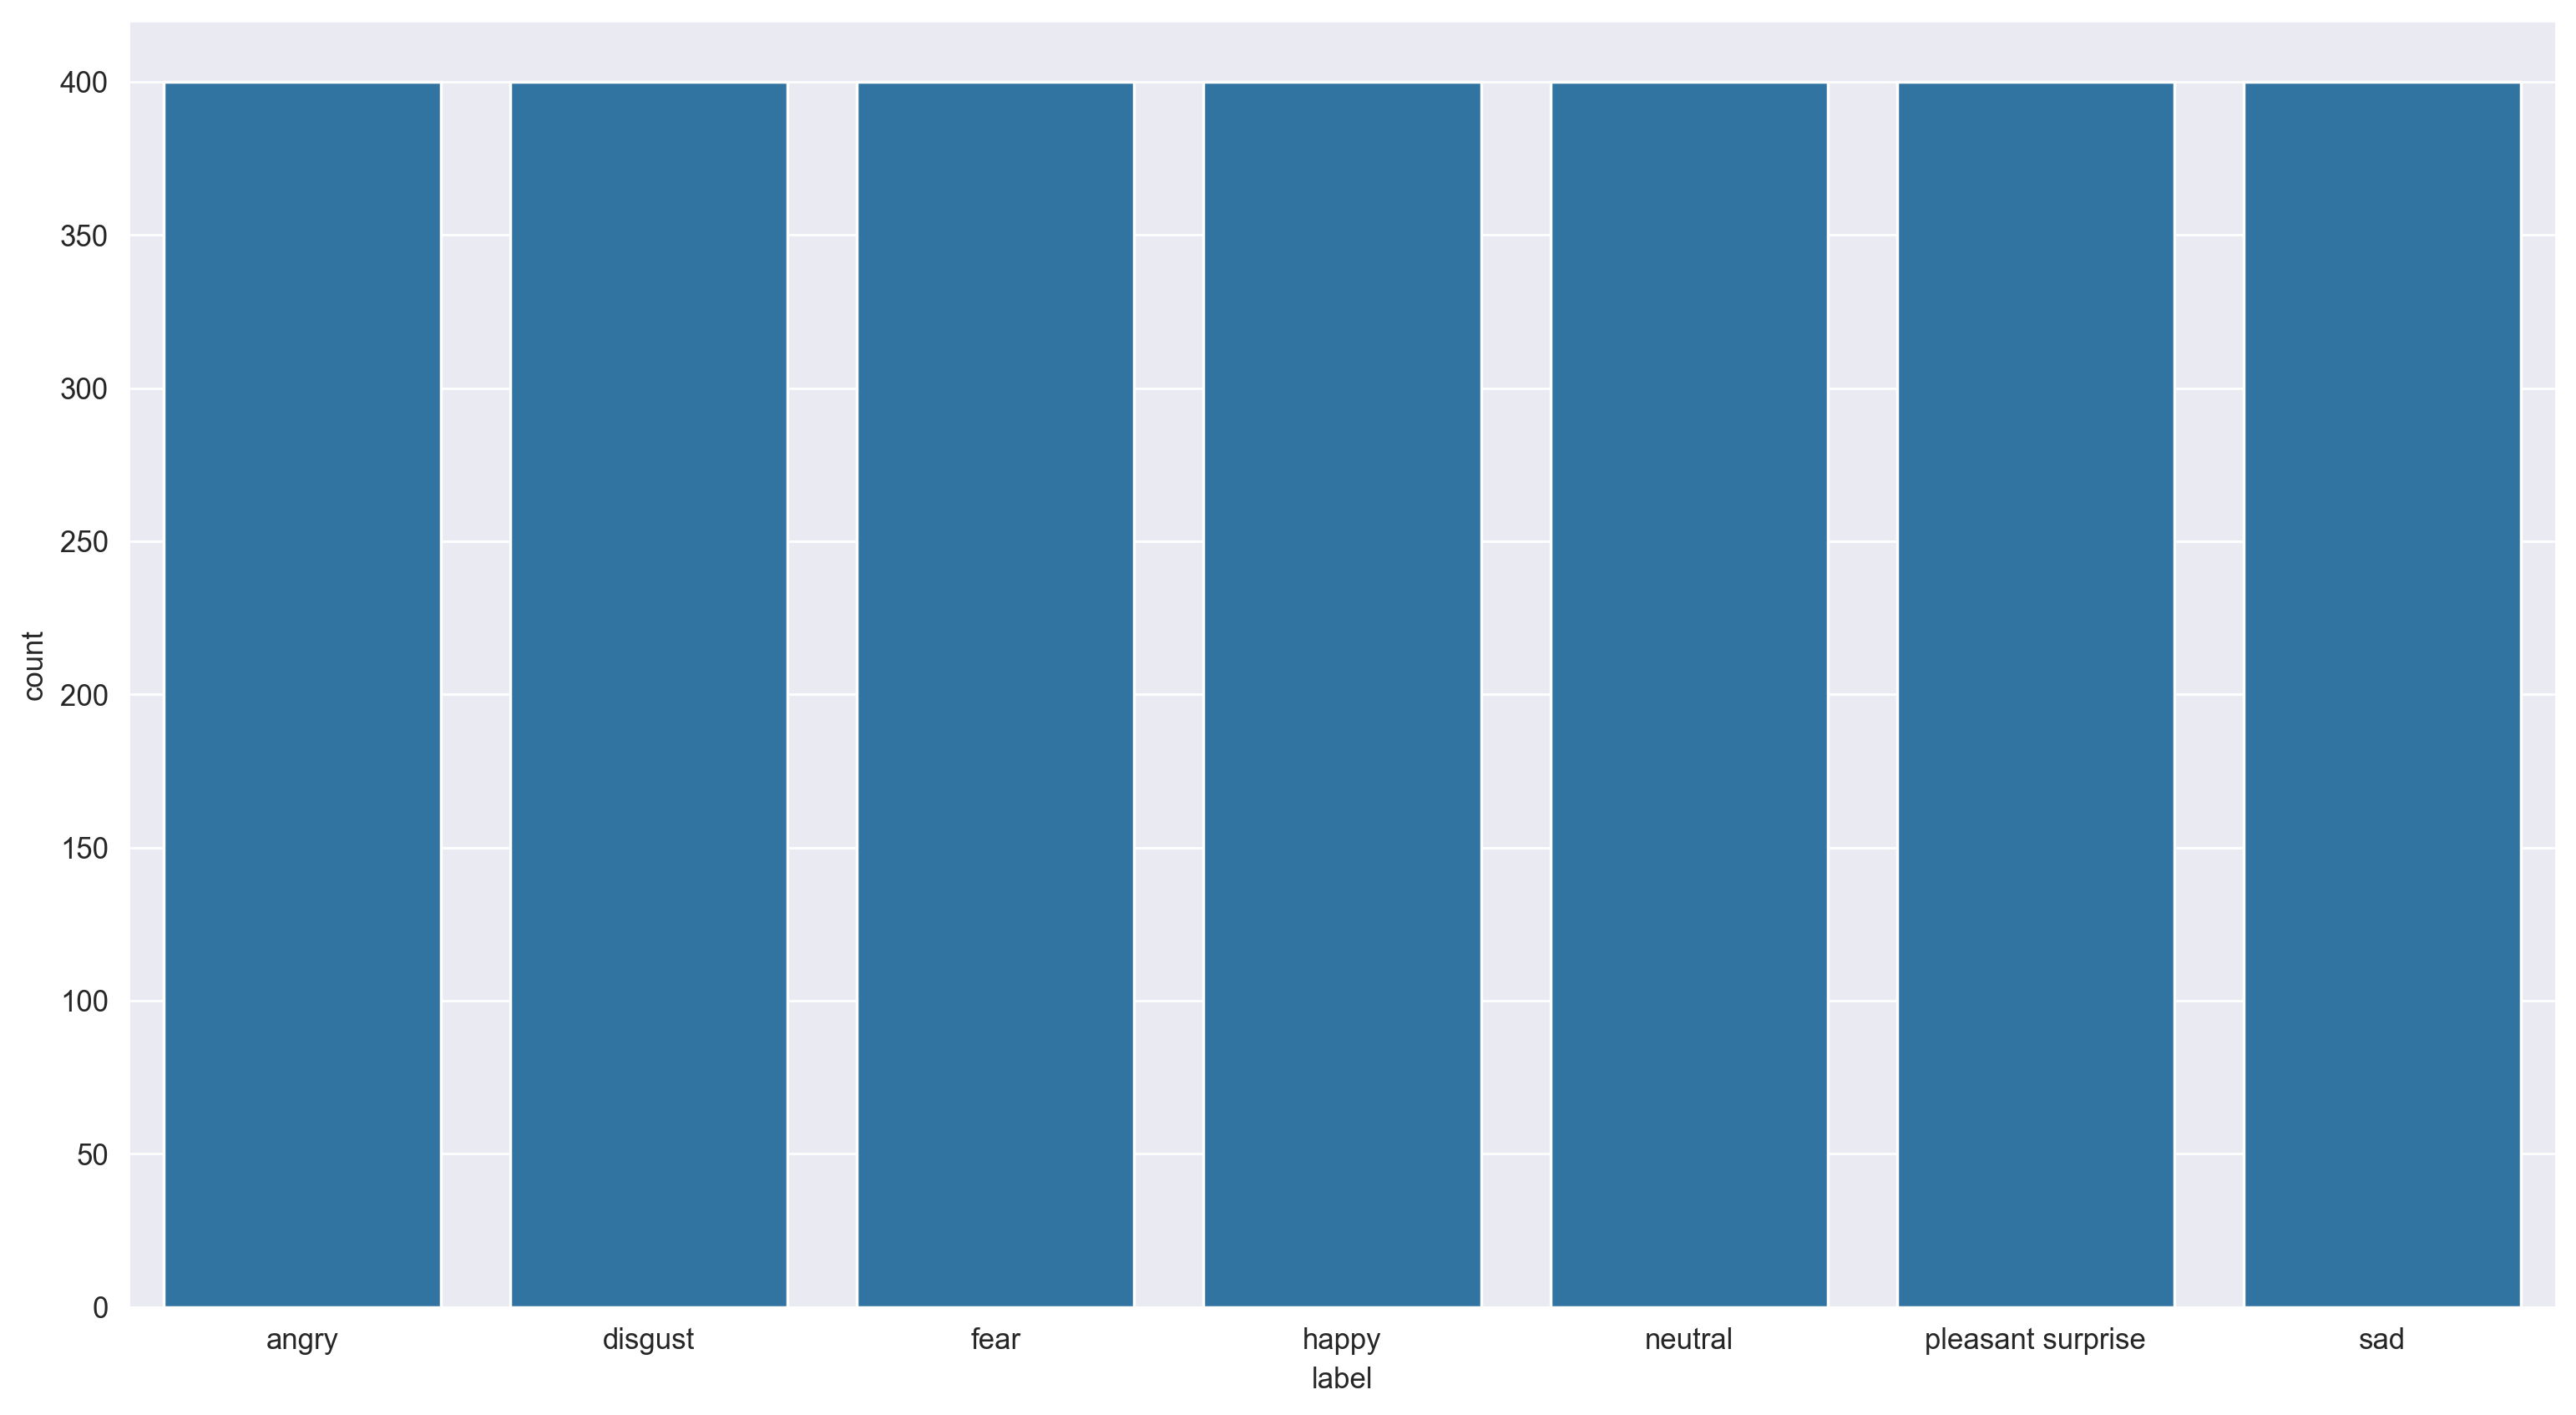

In [9]:
sns.countplot(data=se, x='label')

### Ploting Waveform

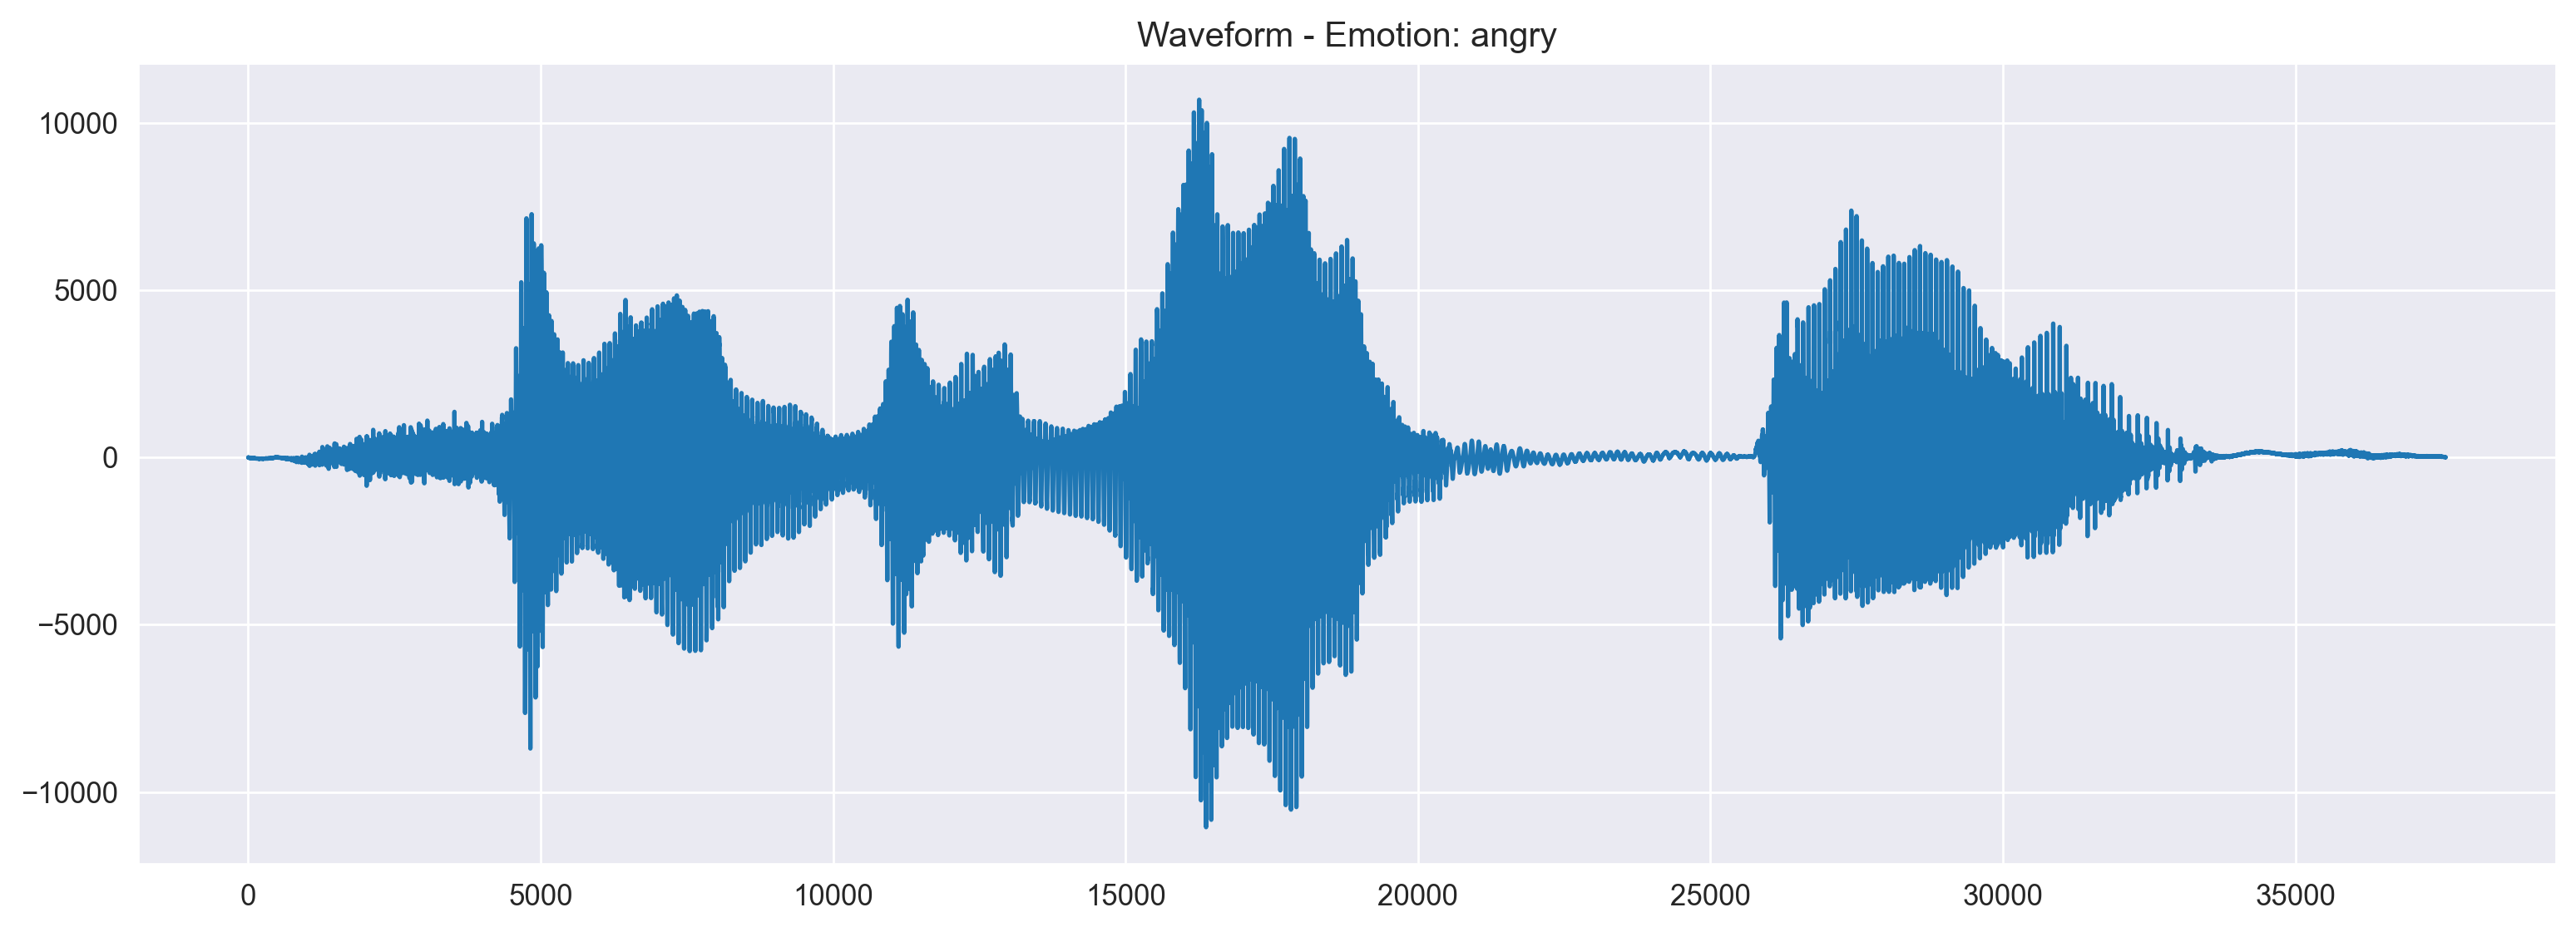

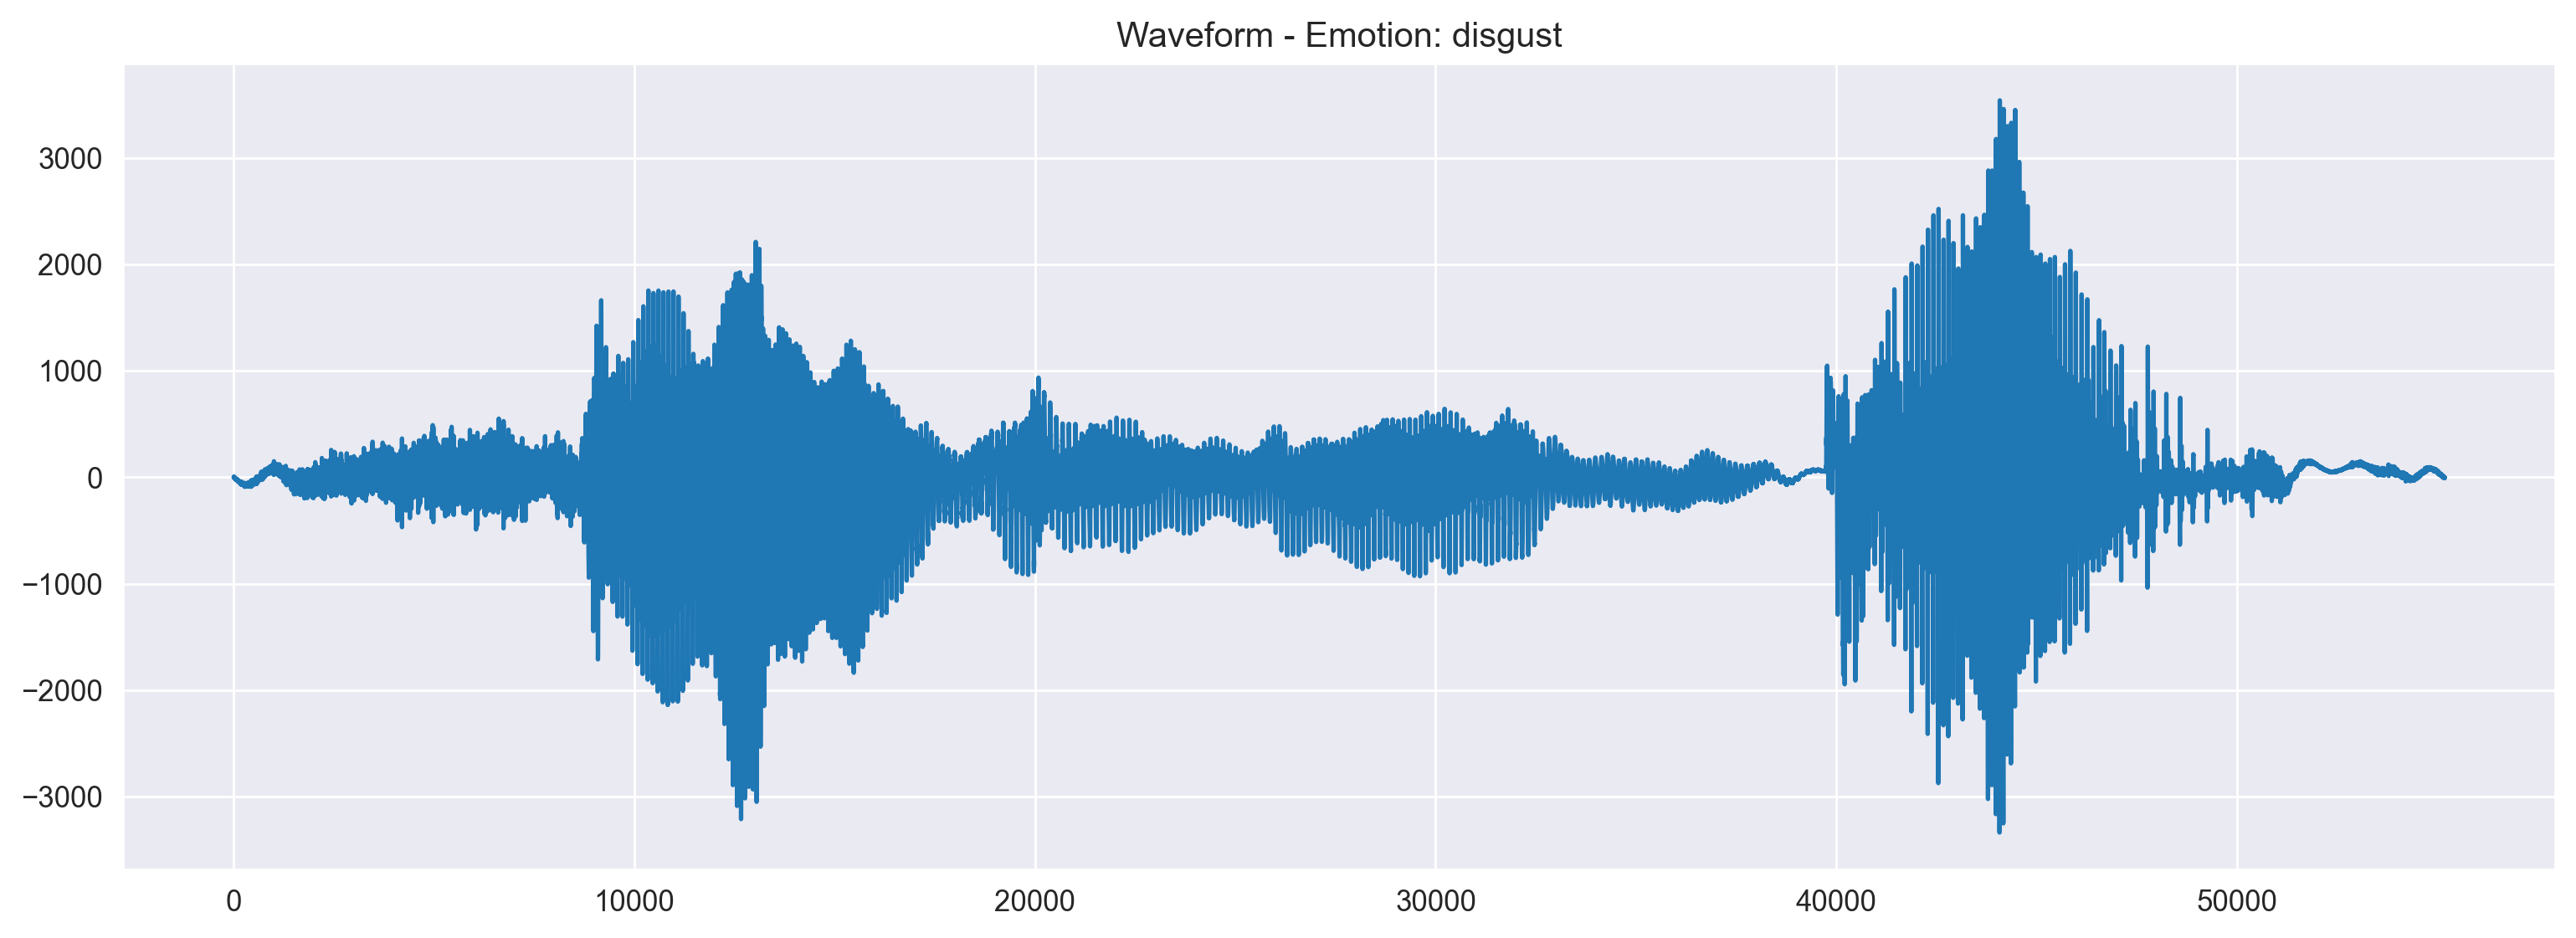

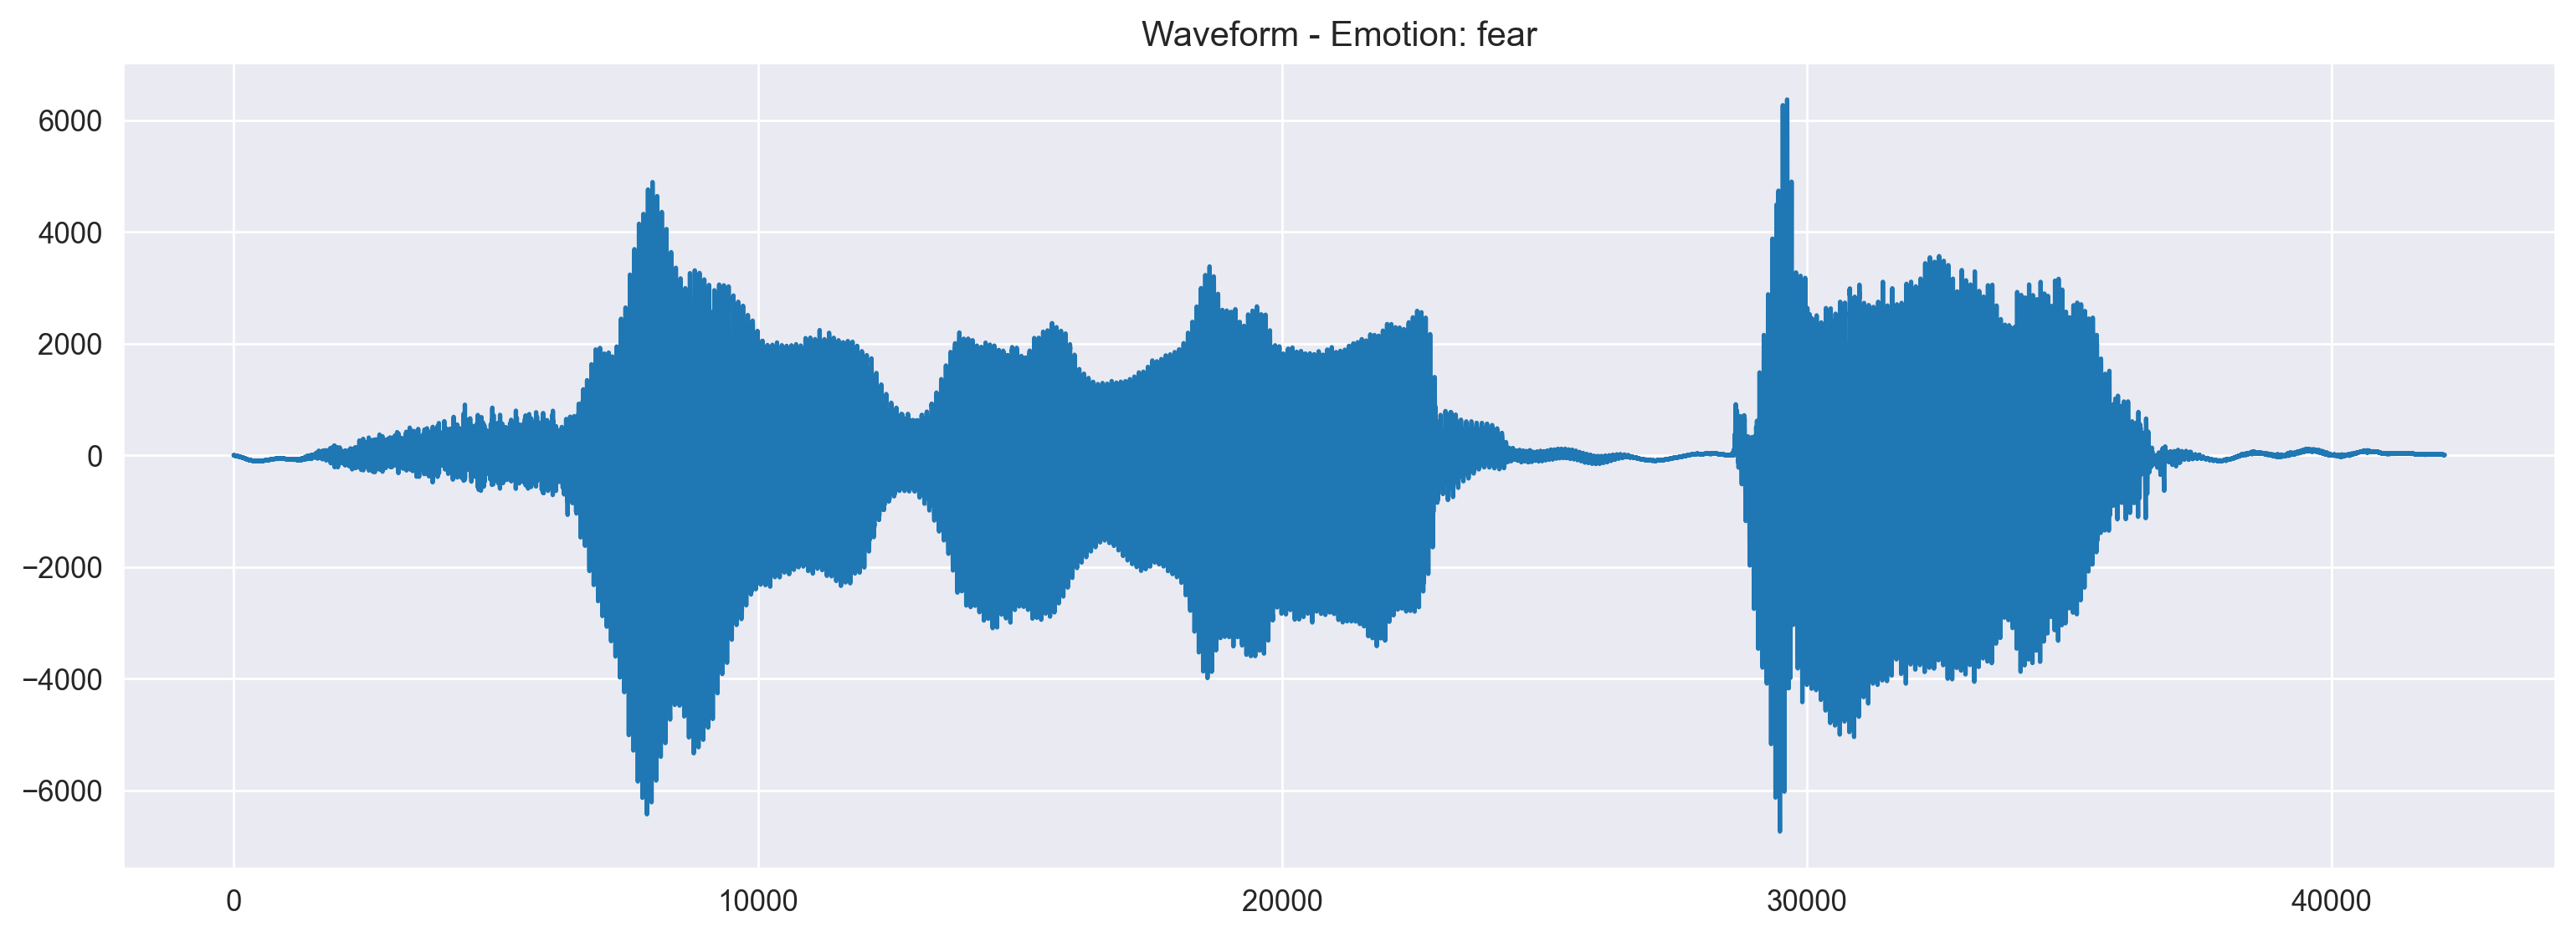

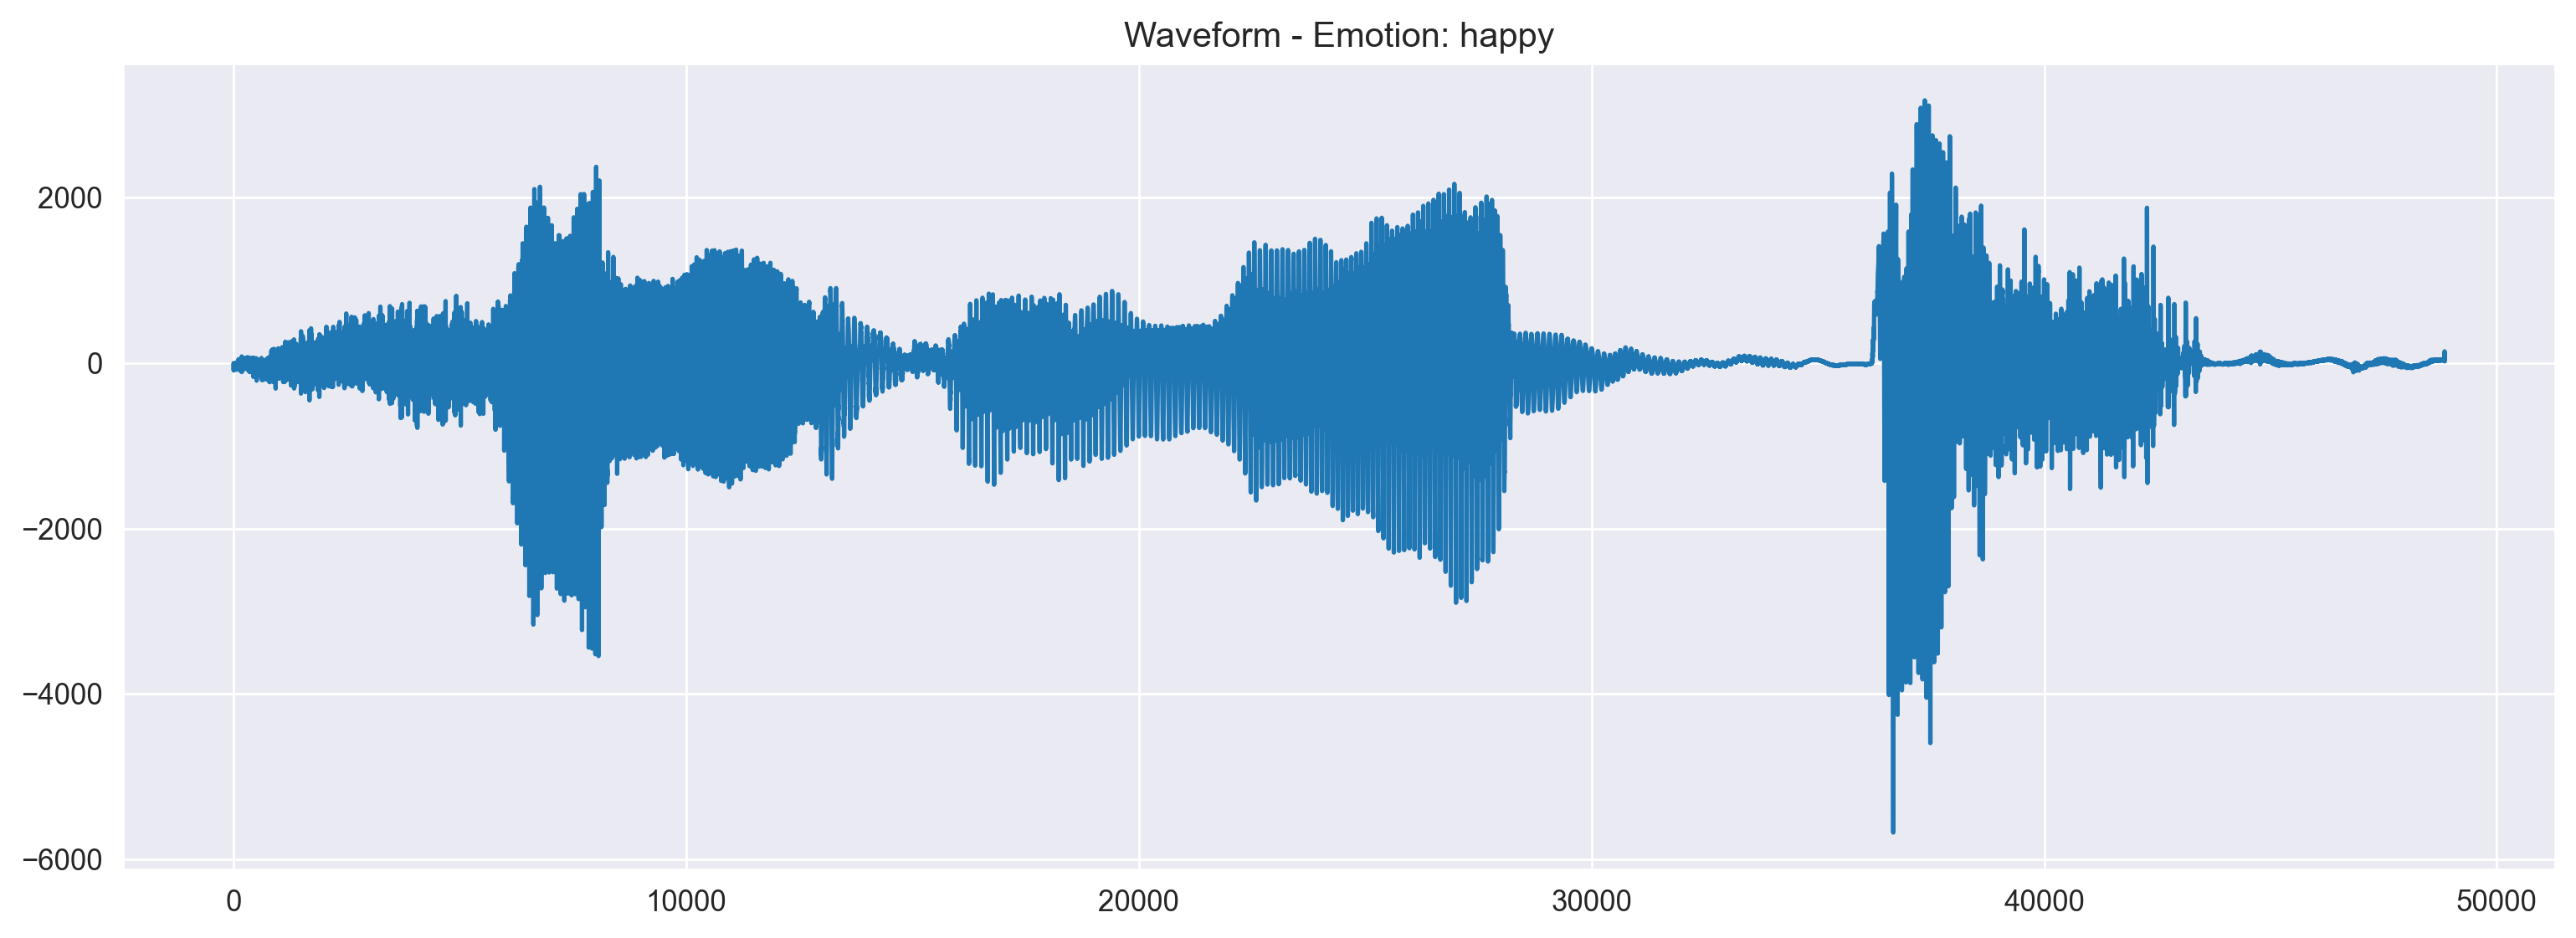

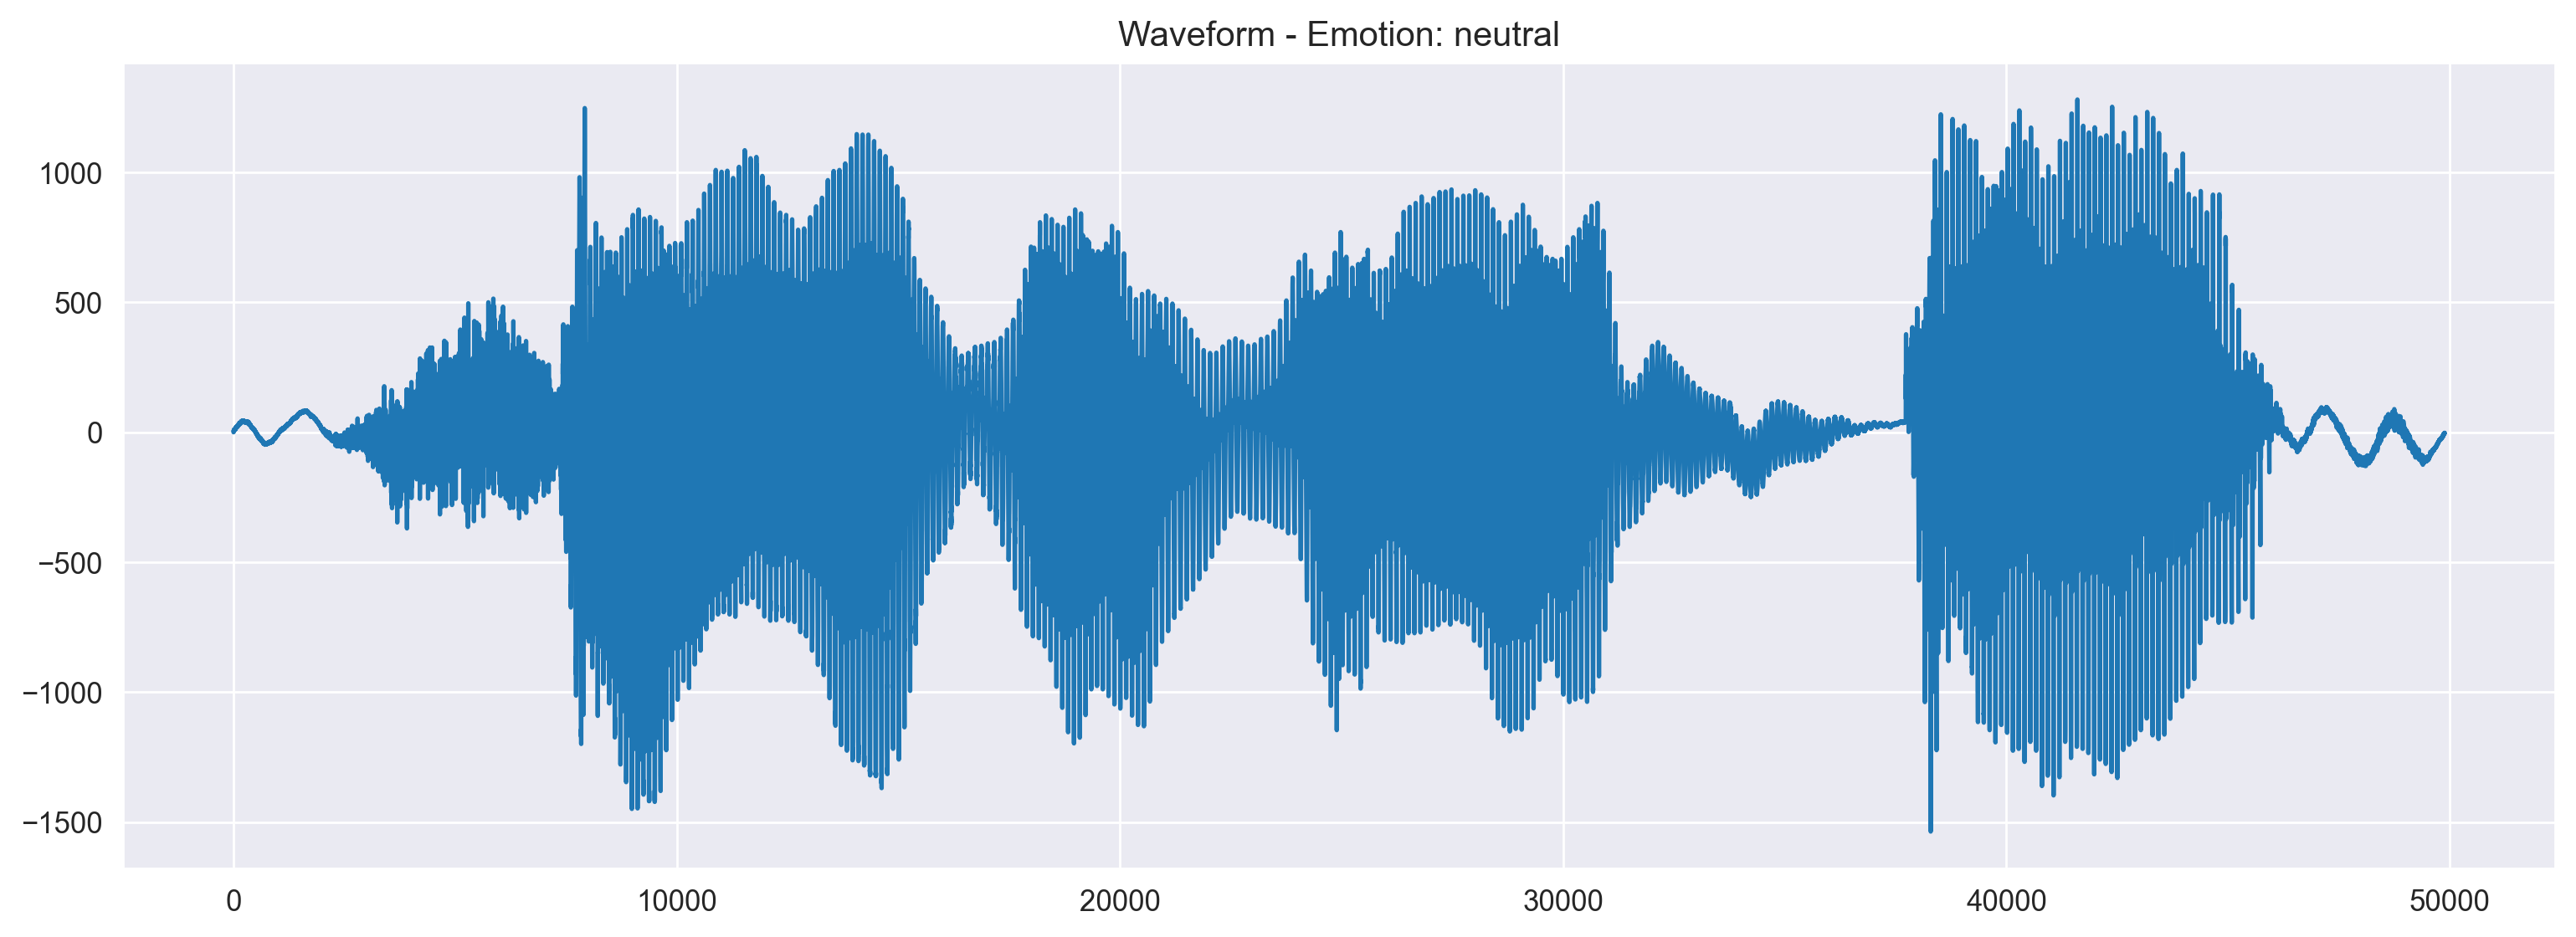

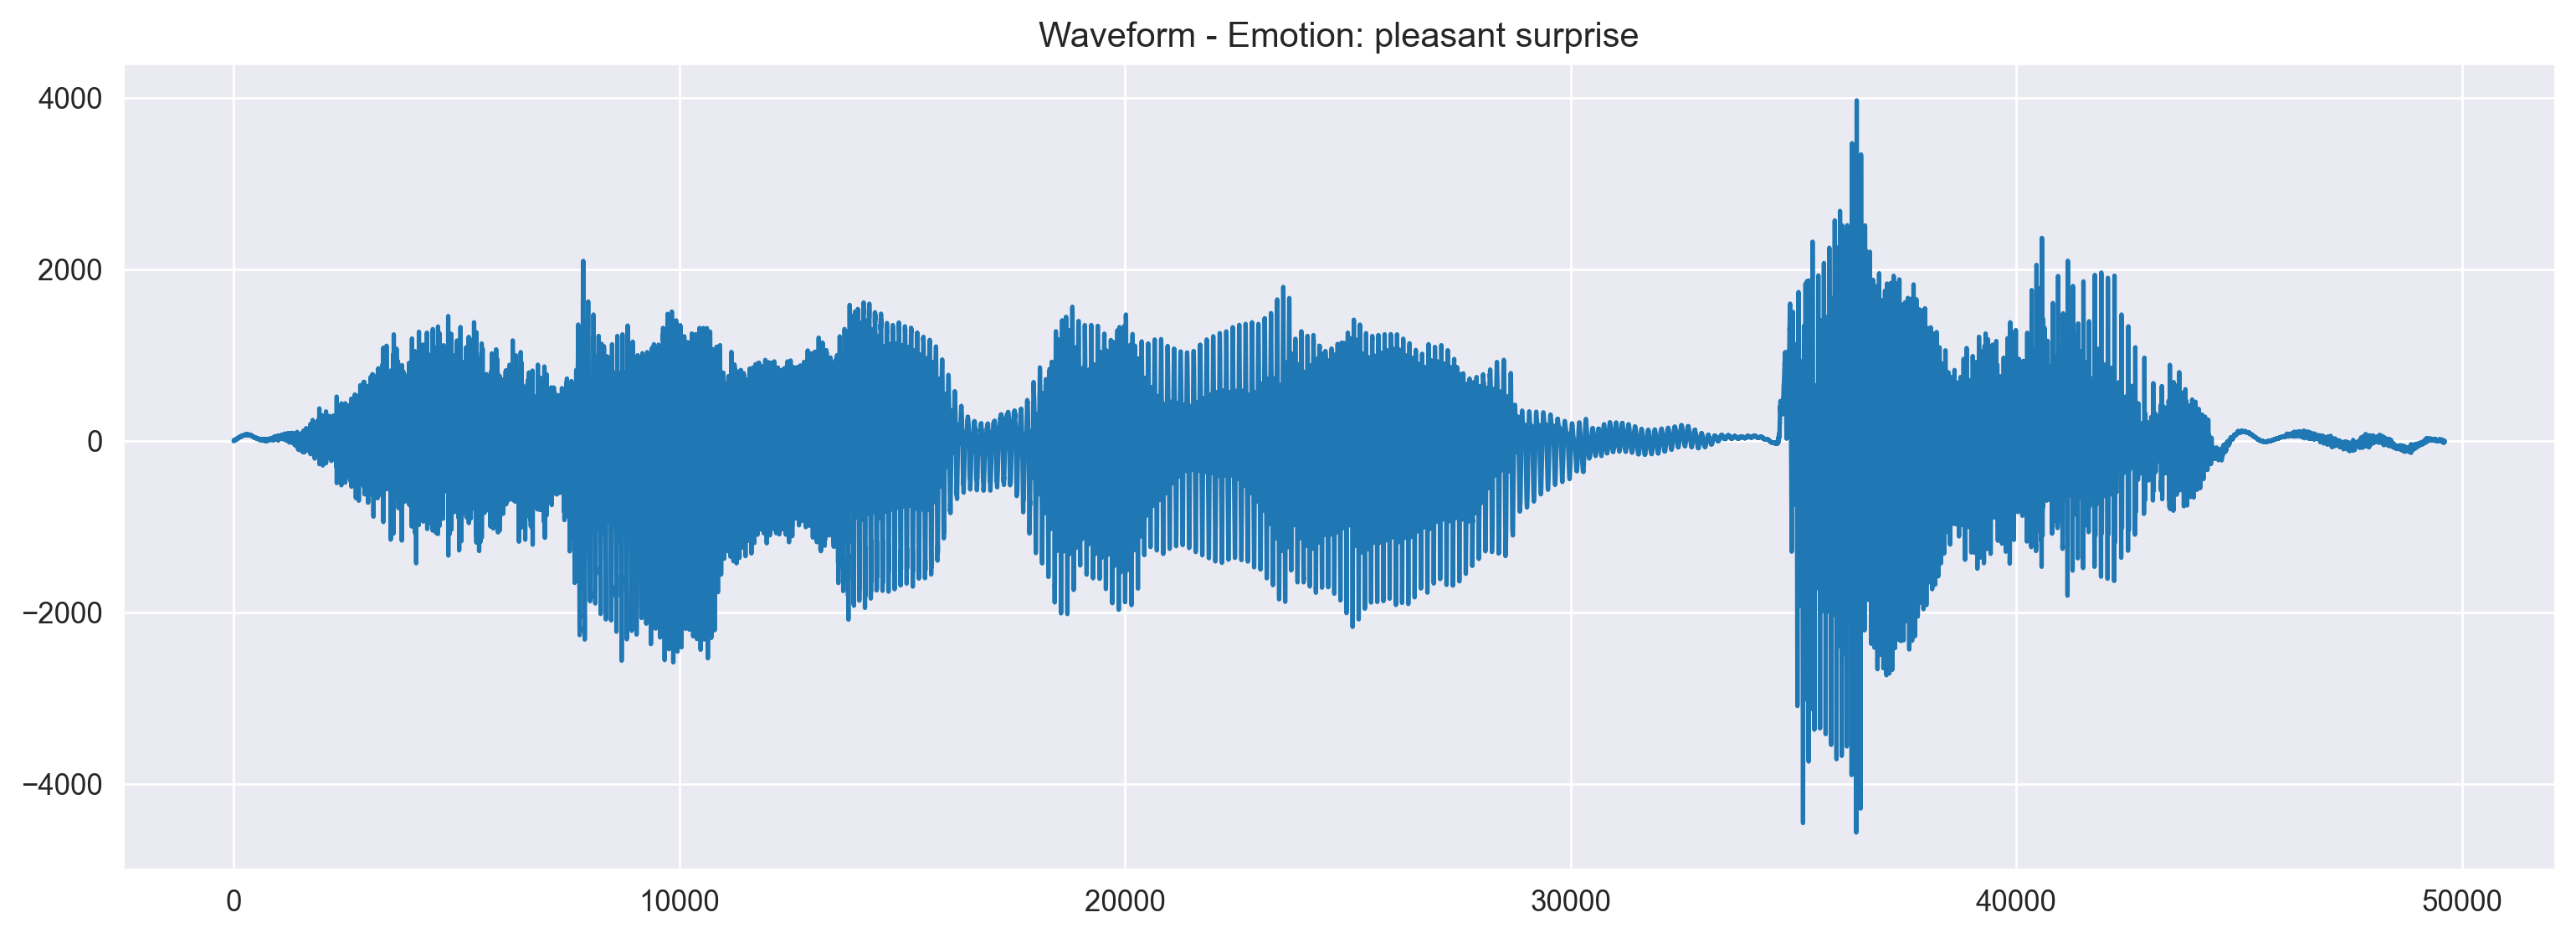

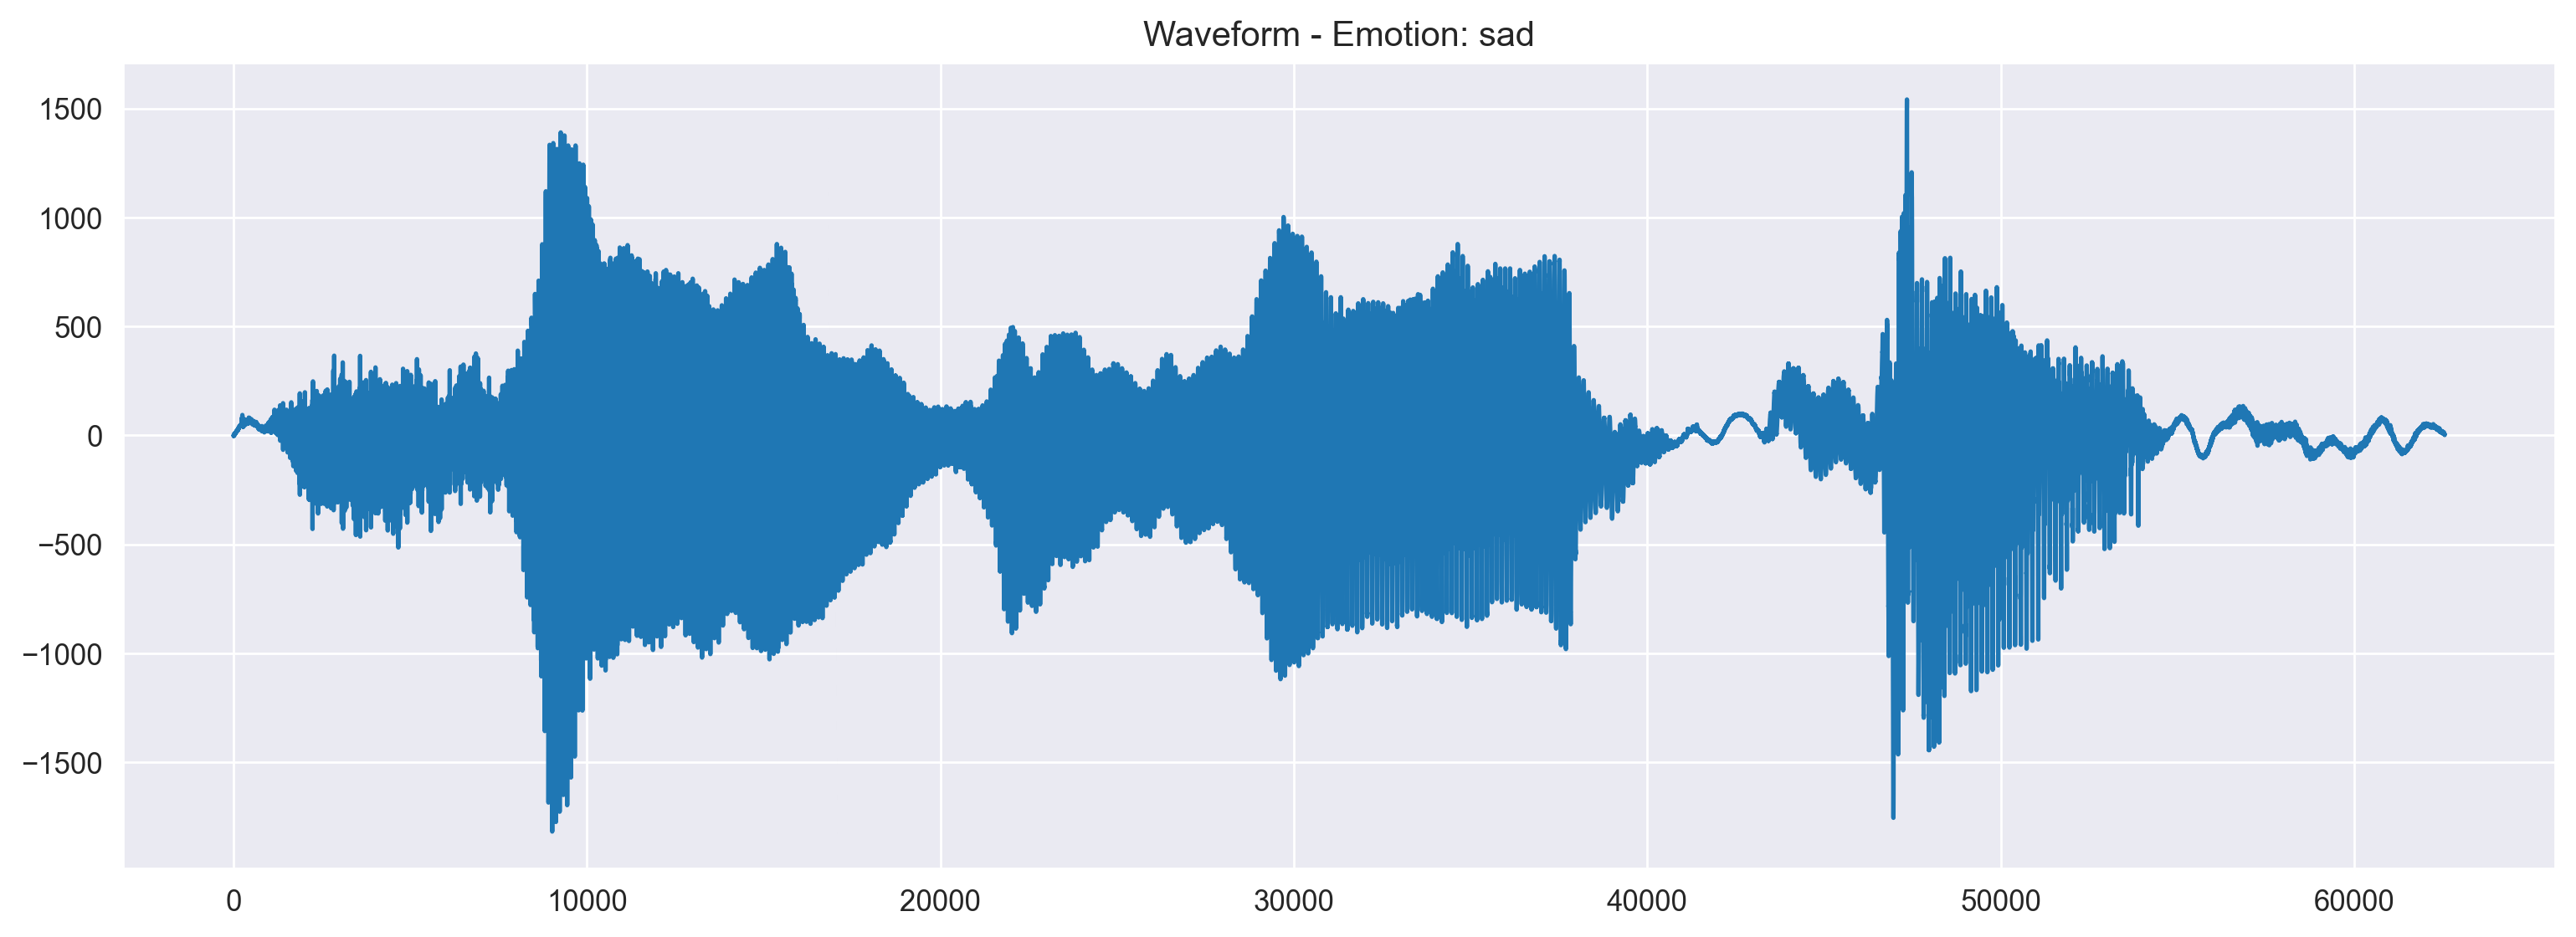

In [10]:
grouped = se.groupby('label')

def plot_waveform(audio_path, emotion):
    # Load the audio file using pydub
    audio = AudioSegment.from_wav(audio_path)
    samples = np.array(audio.get_array_of_samples())

    # Create a figure for the plots
    fig, axes = plt.subplots(figsize=(15, 5))

    # Plot the waveform
    plt.plot(samples)
    plt.title(f'Waveform - Emotion: {emotion}')

# Loop through each emotion and plot waveform and spectrogram
for emotion, group in grouped:
    audio_path = group['speech'].values[0]
    plot_waveform(audio_path, emotion)

### Ploting Spectrogram

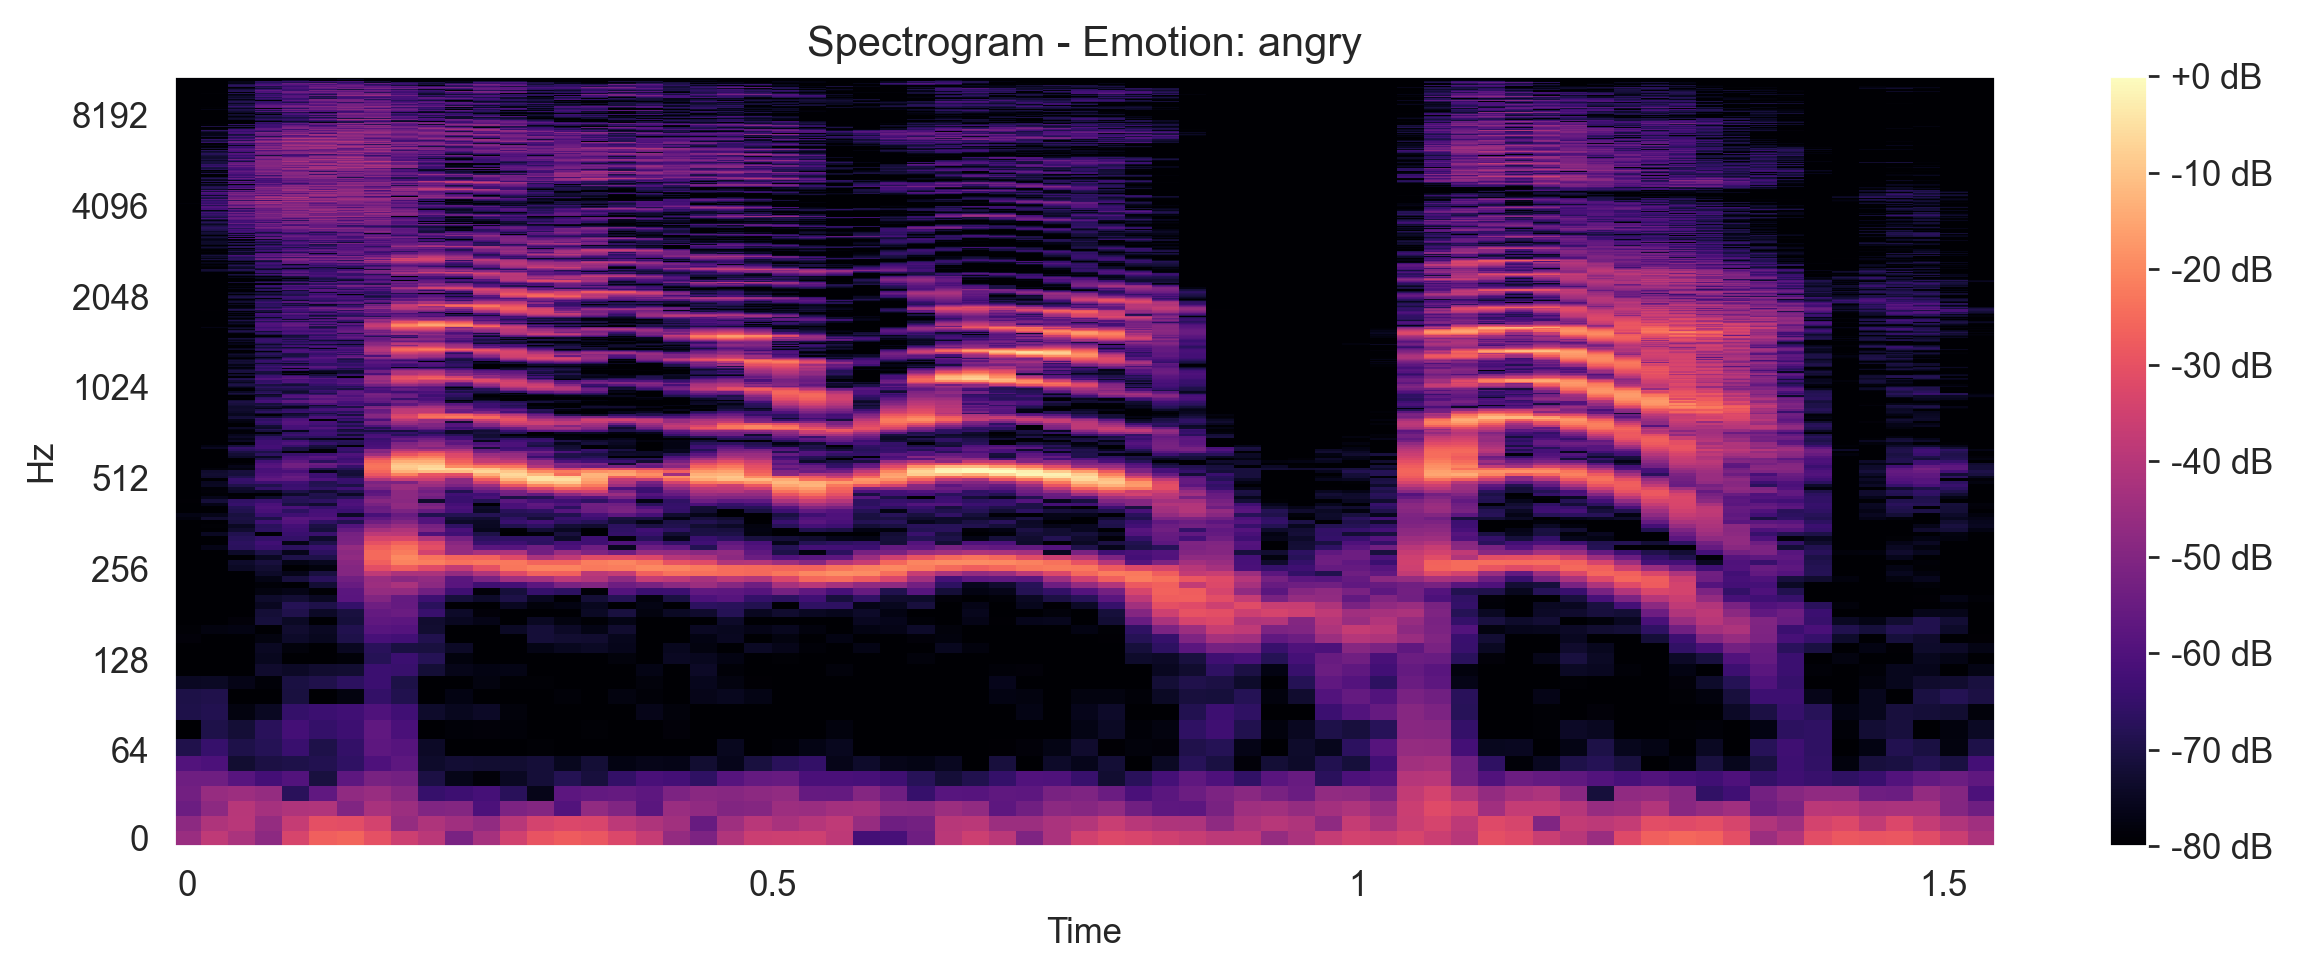

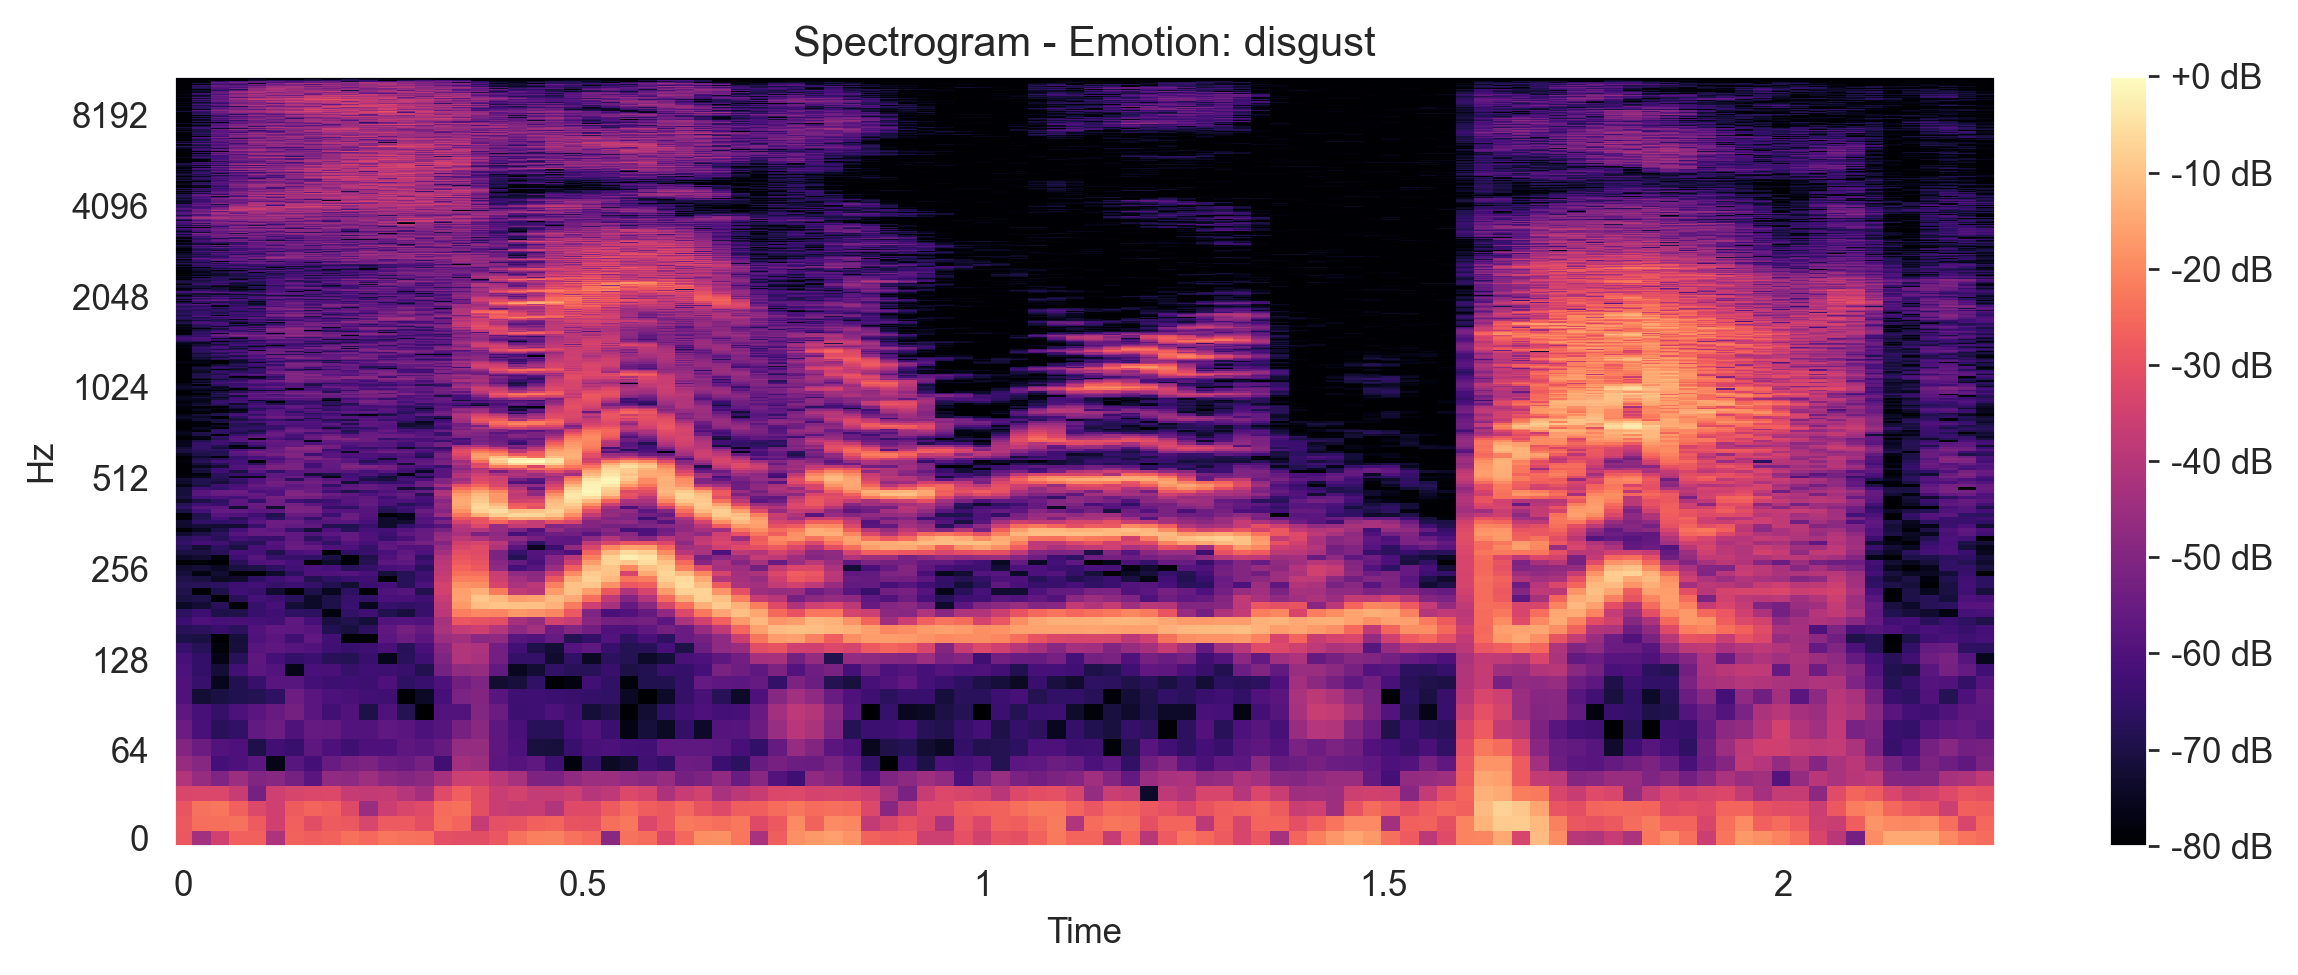

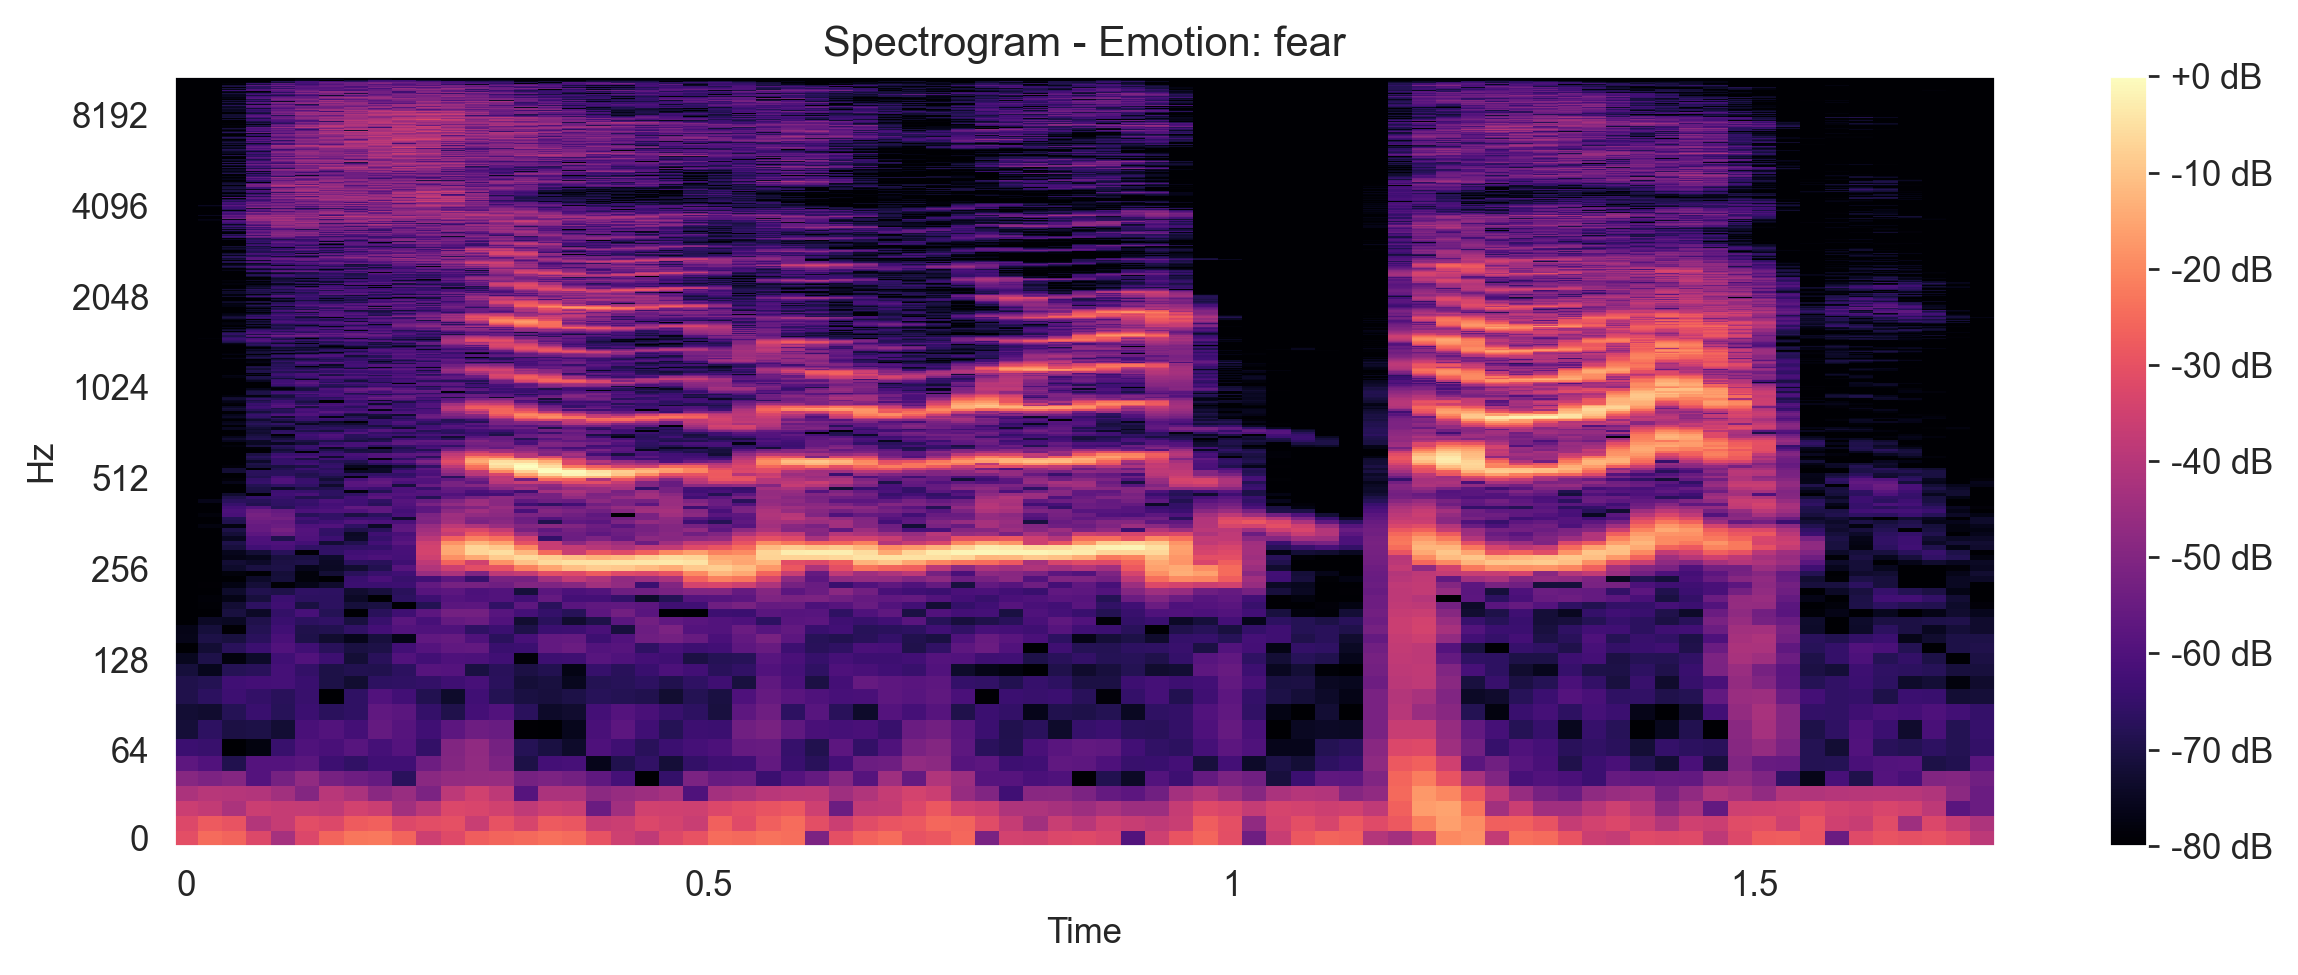

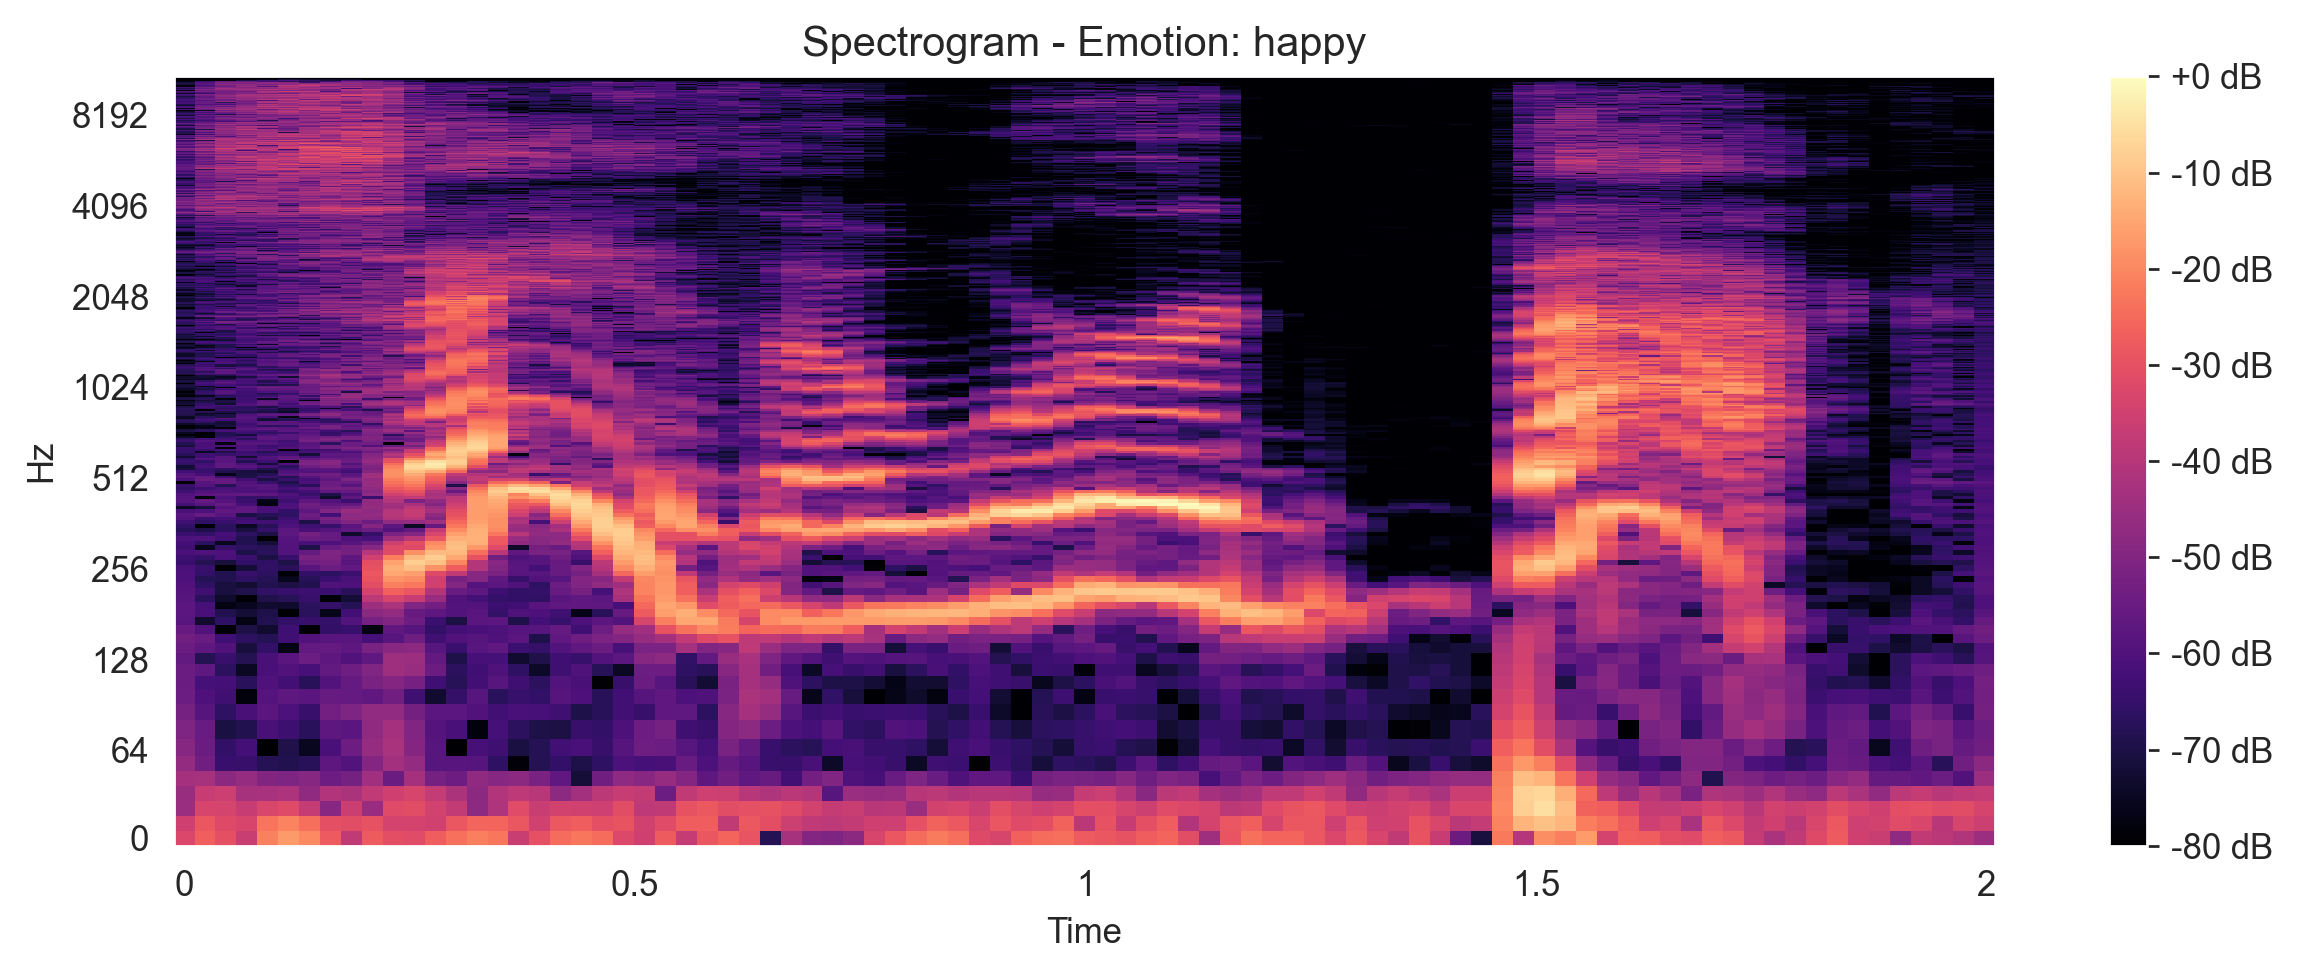

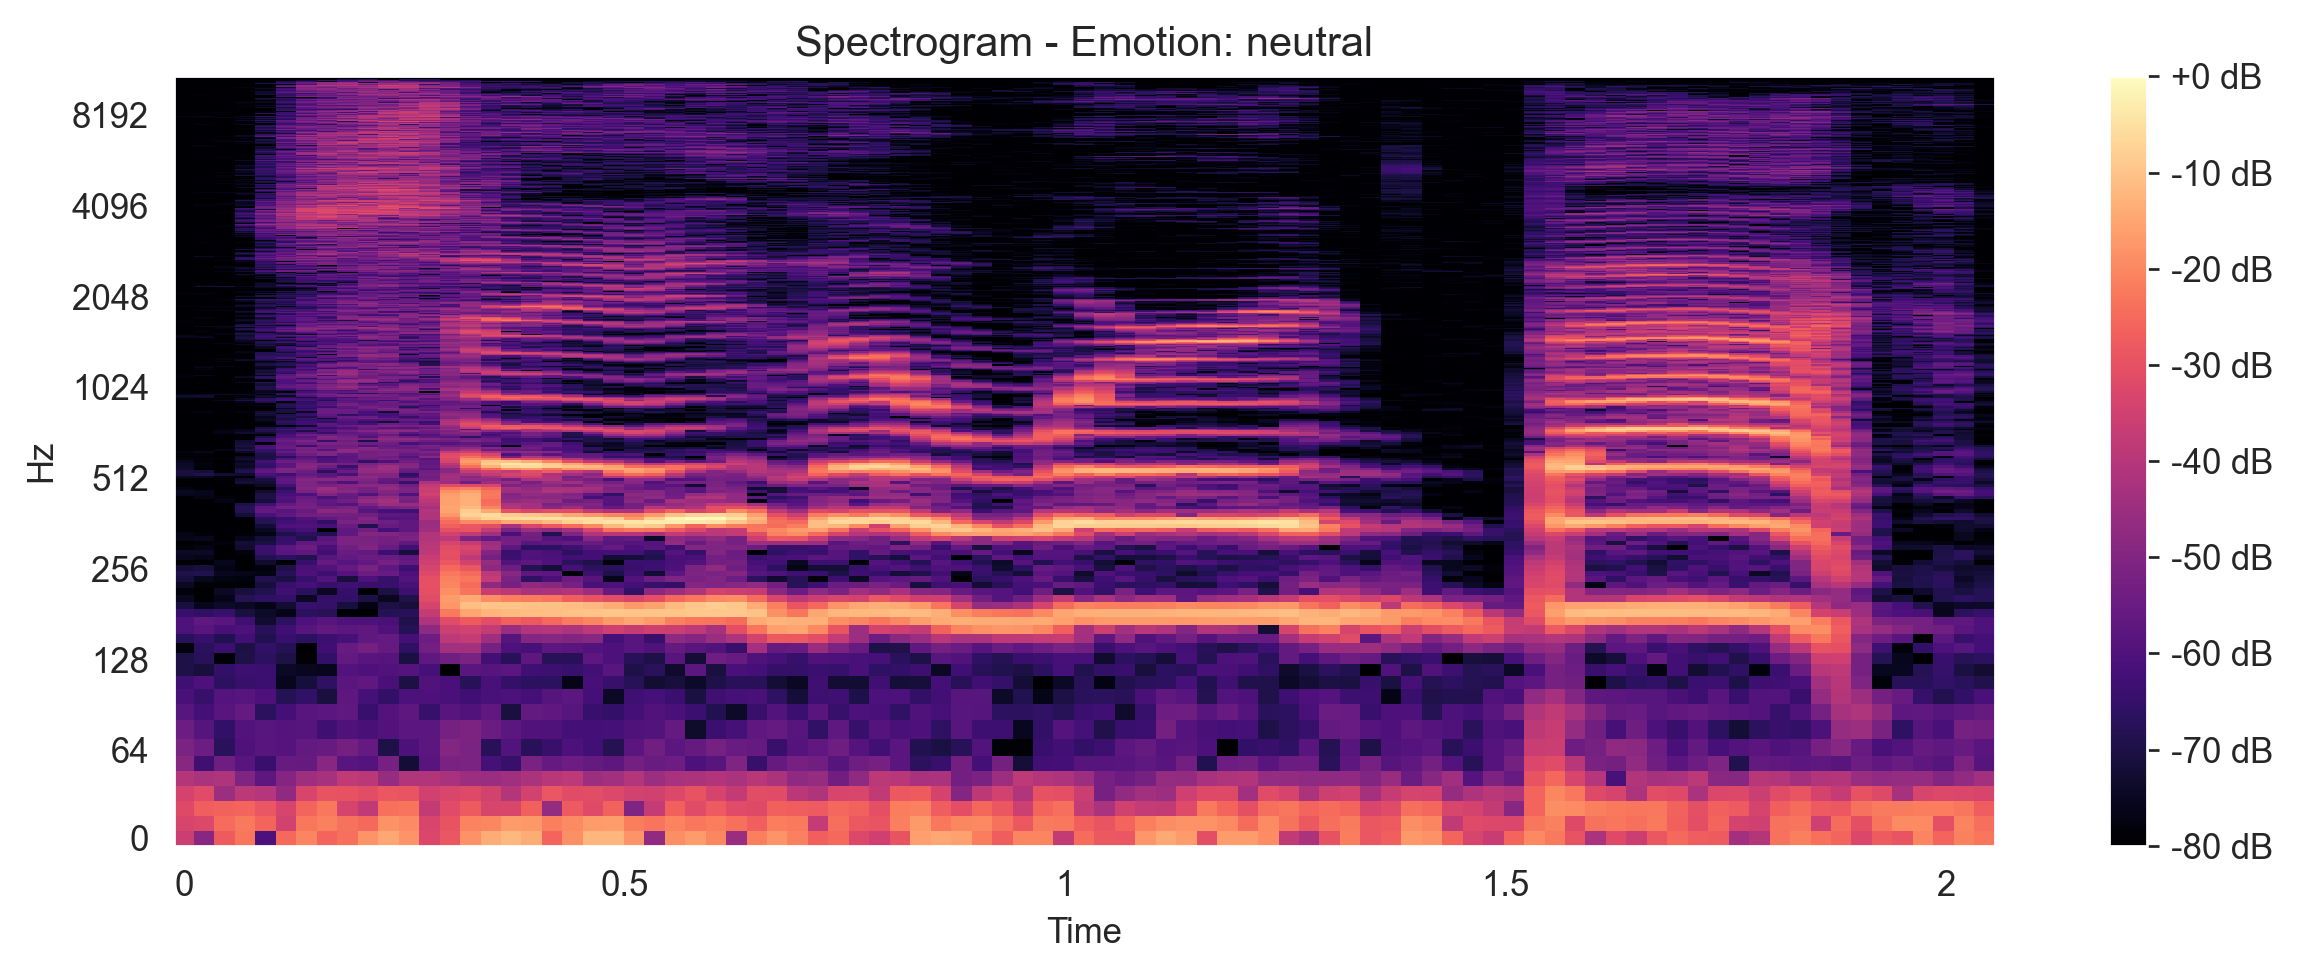

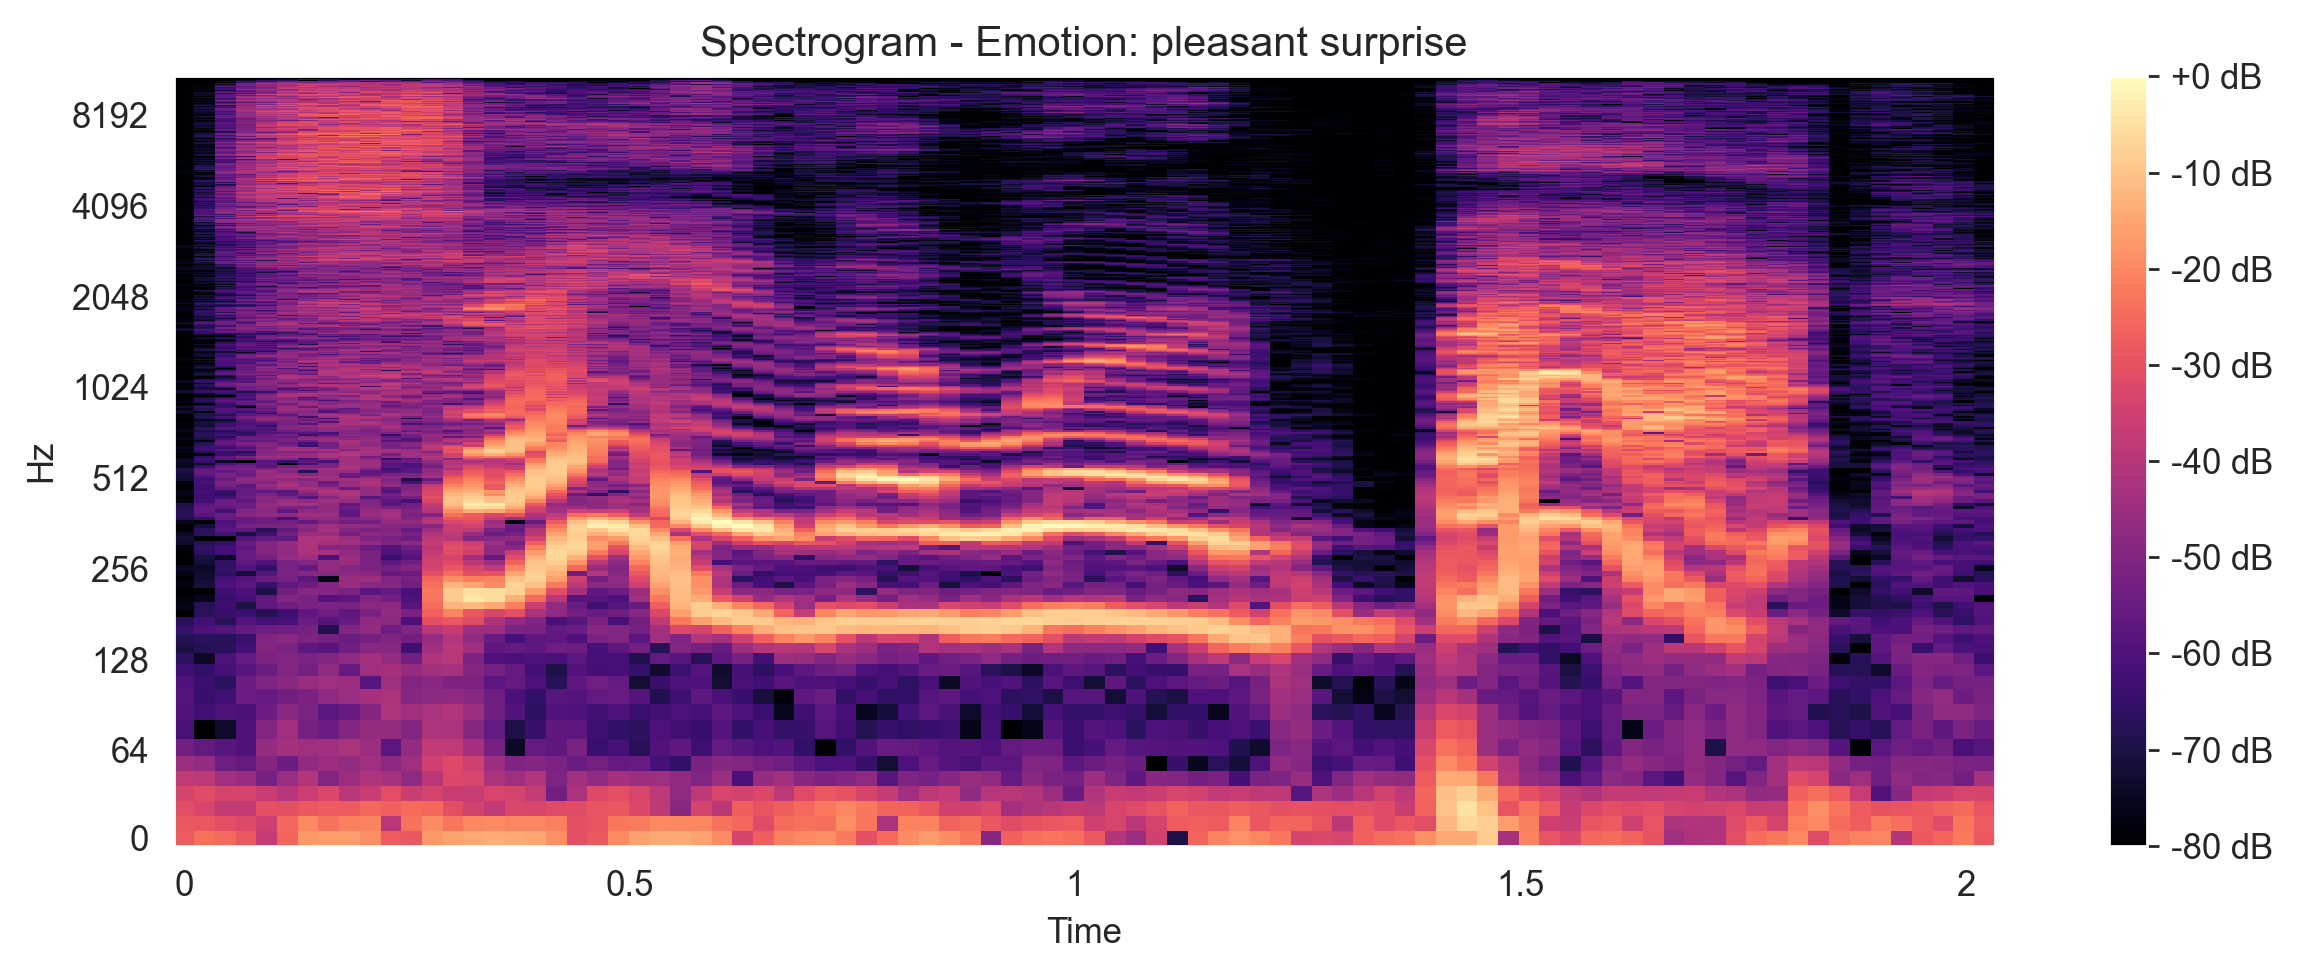

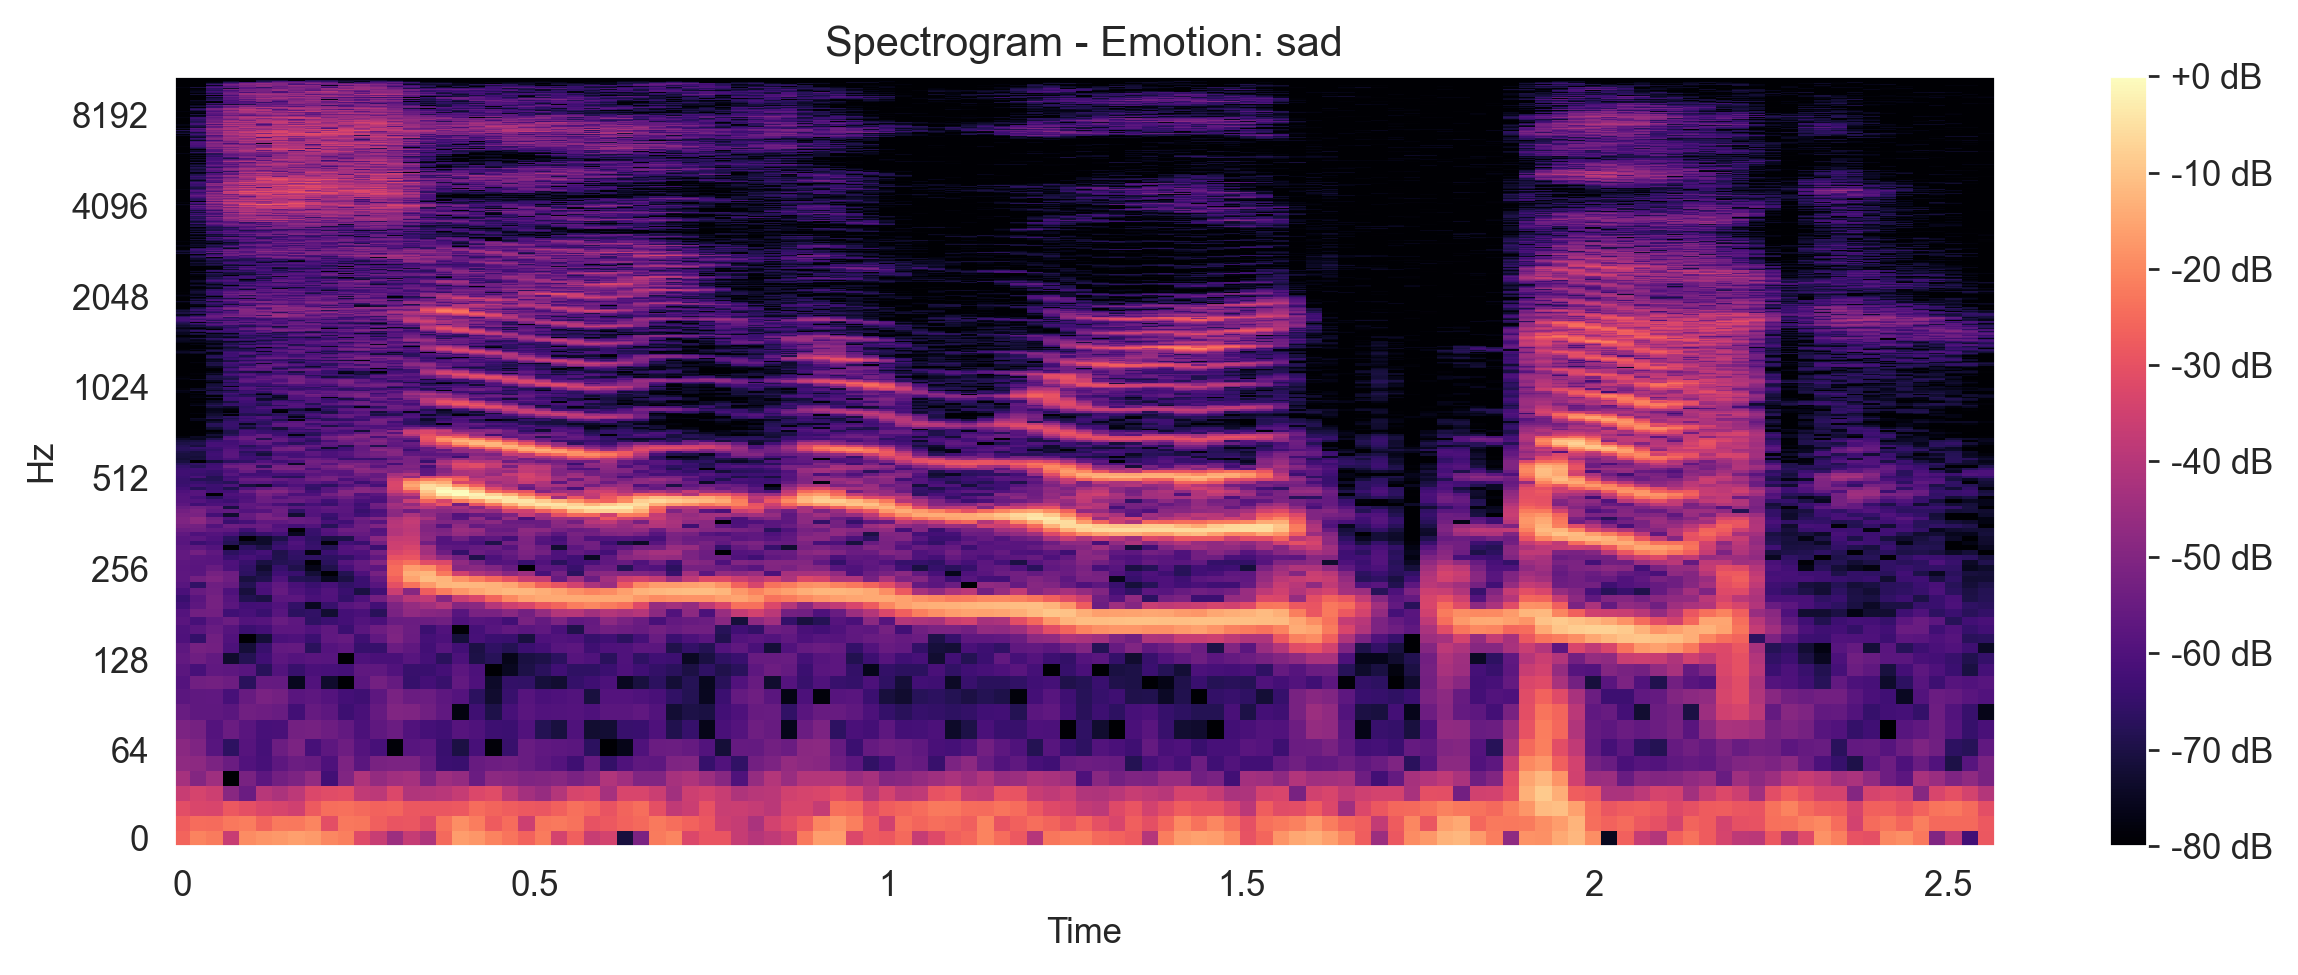

In [11]:
grouped = se.groupby('label')

def plot_spectrogram(audio_path, emotion):
    y, sr = librosa.load(audio_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - Emotion: {emotion}')
    plt.tight_layout()
    plt.show()

# Loop through each emotion and plot spectrograms
for emotion, group in grouped:
    audio_path = group['speech'].values[0]
    plot_spectrogram(audio_path, emotion)